In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
from tqdm import tqdm

In [82]:
# read the file from new_df_8.csv to new_df_12.csv
df_new = []
for i in range(8, 13):
    df_new.append(pd.read_csv(f'new_df_{i}.csv'))



In [83]:
# read unique_types.csv into a list
unique_types = pd.read_csv('unique_types.csv')
unique_types = unique_types['type'].tolist()
print(len(unique_types))
# # delete the unique_types columns in new_df if the number of the type is less than 100 that not 0
# for col in unique_types:
#     if (new_df[col] != 0).sum() < 500:
#         new_df = new_df.drop(columns=[col])
#         # delete the type in the list
#         unique_types.remove(col)
        
print(f"Number of columns left for unique_types: {len(unique_types)}")


36
Number of columns left for unique_types: 36


In [84]:
new_df = df_new[2]
# Calculate the frequency of the number 0 across all unique_types columns
zero_count = (new_df[unique_types] == 0).sum().sum()

# Calculate the total count of all numbers in unique_types columns
total_count = len(new_df) * len(unique_types)

# Calculate the overall percentage of the number 0
zero_percentage = (zero_count / total_count) * 100

# Print the percentage of the number 0
print(f"Percentage of 0: {zero_percentage:.2f}%")

Percentage of 0: 71.91%


In [85]:
# replce the number of all the outliers in 5 dataset in df_new if the it is larger than 99.99% quantile in the unique_types to the 99.99% quantile
for i in range(5):
    for col in unique_types:
        if df_new[i][col].quantile(0.999) < df_new[i][col].max():
            df_new[i].loc[df_new[i][col] > df_new[i][col].quantile(0.999), col] = df_new[i][col].quantile(0.999)
        

In [86]:
# print the max value of the unique_types
for col in unique_types:
    print(f"Max value of {col}: {df_new[3][col].max()}")

Max value of Noise - Park - Loud Music/Party: 65
Max value of Noise - Residential - Loud Music/Party: 417.86800000001676
Max value of Noise - Street/Sidewalk - Loud Talking: 138.43400000000838
Max value of Noise - Vehicle - Car/Truck Music: 229.43400000000838
Max value of Noise - Helicopter - Other: 354.1700000000419
Max value of Noise - Residential - Banging/Pounding: 491.86800000001676
Max value of Noise - Street/Sidewalk - Loud Music/Party: 601.7360000000335
Max value of Noise - Commercial - Loud Music/Party: 284.30200000002515
Max value of Noise - Commercial - Loud Talking: 35
Max value of Noise - Residential - Loud Talking: 113.73600000003353
Max value of Noise - Vehicle - Car/Truck Horn: 29
Max value of Noise - Commercial - Banging/Pounding: 30
Max value of Noise - Noise: Construction Before/After Hours (NM1): 55.43400000000838
Max value of Noise - Noise, Barking Dog (NR5): 26.434000000008382
Max value of Noise - Noise: Jack Hammering (NC2): 10
Max value of Noise - Residential - 

In [ ]:
# zero_frequencies = (new_df[unique_types] == 0).sum() / len(new_df)

# # >80% columns with 0
# columns_to_drop = zero_frequencies[zero_frequencies > 0.8].index

# # Drop the columns
# new_df.drop(columns=columns_to_drop, inplace=True)

# # Print the columns that were dropped
# print(f"Deleted columns: {list(columns_to_drop)}")

Deleted columns: ['Noise - Park - Loud Music/Party', 'Noise - Helicopter - Other', 'Noise - Commercial - Loud Talking', 'Noise - Commercial - Car/Truck Horn', 'Noise - Noise: Private Carting Noise (NQ1)', 'Noise - Noise, Other Animals (NR6)', 'Noise - Noise:  lawn care equipment (NCL)', 'Noise - House of Worship - Loud Music/Party', 'Noise - Commercial - Loud Television', 'Noise - Helicopter - NYPD', 'Collection Truck Noise - 21 Collection Truck Noise', 'Noise - Commercial - Car/Truck Music', 'Noise - Park - Loud Talking', 'Noise - Noise, Ice Cream Truck (NR4)', 'Noise - Noise: Boat(Engine,Music,Etc) (NR10)', 'Noise - Noise: Manufacturing Noise (NK1)', 'Noise - House of Worship - Loud Talking', 'Noise - Helicopter - News Gathering', 'Noise - House of Worship - Banging/Pounding']


In [91]:
new_df[unique_types].describe()

KeyError: "['Noise - Park - Loud Music/Party', 'Noise - Helicopter - Other', 'Noise - Commercial - Loud Talking', 'Noise - Commercial - Car/Truck Horn', 'Noise - Noise: Private Carting Noise (NQ1)', 'Noise - Noise, Other Animals (NR6)', 'Noise - Noise:  lawn care equipment (NCL)', 'Noise - House of Worship - Loud Music/Party', 'Noise - Commercial - Loud Television', 'Noise - Helicopter - NYPD', 'Collection Truck Noise - 21 Collection Truck Noise', 'Noise - Commercial - Car/Truck Music', 'Noise - Park - Loud Talking', 'Noise - Noise, Ice Cream Truck (NR4)', 'Noise - Noise: Boat(Engine,Music,Etc) (NR10)', 'Noise - Noise: Manufacturing Noise (NK1)', 'Noise - House of Worship - Loud Talking', 'Noise - Helicopter - News Gathering', 'Noise - House of Worship - Banging/Pounding'] not in index"

In [90]:
# import pandas as pd

# def calculate_weighted_boundaries_4_classes(df_list, unique_types):
#     boundaries_per_dataset = []

#     for df in df_list:
#         # Step 1: Calculate total complaint count per row
#         df['total_complaint_count'] = df[unique_types].sum(axis=1)
        
#         # Step 2: Calculate 4 quantile boundaries based on the total complaint count
#         total_boundaries = {
#             0: 0,  # No complaints
#             1: df['total_complaint_count'].quantile(0.001),  # Low complaints
#             2: df['total_complaint_count'].quantile(0.5),   # Moderate complaints
#             3: df['total_complaint_count'].quantile(0.9)   # High complaints
#         }

#         # Step 3: Calculate weights for each unique_types column (e.g., based on mean or sum)
#         column_weights = {col: df[col].mean() for col in unique_types}  # Example: use mean as weight

#         # Initialize dictionary to store adjusted boundaries for each column
#         boundaries_per_type = {}

#         # Step 4: Adjust boundaries for each unique_types column based on weights
#         for col in unique_types:
#             # Use the total boundaries scaled by the weight of the column
#             col_weight = column_weights[col]
#             max_weight = max(column_weights.values())
#             boundaries_per_type[col] = {
#                 level: total_boundaries[level] * col_weight / max_weight
#                 for level in total_boundaries
#             }

#             # Debug: Print weighted boundaries for each column
#             # print(f"Weighted boundaries for {col}: {boundaries_per_type[col]}")

#         # Append boundaries for the current dataset to the list
#         boundaries_per_dataset.append(boundaries_per_type)
    
#     return boundaries_per_dataset

# # Function to categorize values in unique_types columns based on weighted boundaries
# def apply_weighted_boundaries_4_classes(df, unique_types, boundaries):
#     def categorize(value, col_boundaries):
#         # Assign category based on adjusted boundaries for 4 classes
#         for category in range(3):
#             if col_boundaries[category] <= value < col_boundaries[category + 1]:
#                 return category
#         return 3  # Assign the highest category if the value is above the last boundary

#     for col in unique_types:
#         col_boundaries = boundaries[col]  # Get specific boundaries for the current column
#         df[col] = df[col].apply(lambda x: categorize(x, col_boundaries))

# # Example usage
# boundaries_per_dataset = calculate_weighted_boundaries_4_classes(df_new, unique_types)  # Calculate weighted boundaries with 4 classes

# for i, df in enumerate(df_new):
#     apply_weighted_boundaries_4_classes(df, unique_types, boundaries_per_dataset[i])


In [55]:
df_new[1][unique_types].describe()
# df_new[4]

,Noise - Park - Loud Music/Party,Noise - Residential - Loud Music/Party,Noise - Street/Sidewalk - Loud Talking,Noise - Vehicle - Car/Truck Music,Noise - Helicopter - Other,Noise - Residential - Banging/Pounding,Noise - Street/Sidewalk - Loud Music/Party,Noise - Commercial - Loud Music/Party,Noise - Commercial - Loud Talking,Noise - Residential - Loud Talking,...,Noise - Helicopter - NYPD,Collection Truck Noise - 21 Collection Truck Noise,Noise - Commercial - Car/Truck Music,Noise - Park - Loud Talking,"Noise - Noise, Ice Cream Truck (NR4)","Noise - Noise: Boat(Engine,Music,Etc) (NR10)",Noise - Noise: Manufacturing Noise (NK1),Noise - House of Worship - Loud Talking,Noise - Helicopter - News Gathering,Noise - House of Worship - Banging/Pounding
count,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,...,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.00000,2719.000000,2719.000000
mean,0.630379,1.203751,1.013976,1.047812,0.421478,1.113645,1.141228,0.905112,0.596543,1.068408,...,0.322177,0.213314,0.621552,0.410077,0.562339,0.219198,0.247150,0.24053,0.212578,0.156675
std,0.767614,0.527089,0.644062,0.601624,0.622424,0.597974,0.521703,0.729772,0.785353,0.653647,...,0.780505,0.686857,0.802768,0.781916,0.811793,0.664278,0.711494,0.70128,0.654730,0.594077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000


In [138]:
# save the 5 dataset to hex8.csv to hex12.csv
for i in range(5):
    df_new[i].to_csv(f'hex{i+8}.csv', index=False)

In [3]:
# read the hex8.csv to hex12.csv
df_new = []
for i in range(8, 13):
    df_new.append(pd.read_csv(f'hex{i}.csv'))

In [56]:
new_df = df_new[1]
new_df

,h3_index,density,stripclub,sports_centre,gatehouse,block,beauty_school,data_center,Noise - Noise: Construction Before/After Hours (NM1),crossing,...,industrial,carport,Noise - Park - Loud Talking,music,bowling,public_bookcase,dog_toilet,summer_camp,Noise - Vehicle - Car/Truck Music,total_complaint_count
0,89f05aa4177ffff,0.000000e+00,0,0,0,0,0,0,1,20,...,0,0,1,0,0,0,0,0,1,247.0
1,89f05aa65a3ffff,3.202530e+07,0,0,0,0,0,0,1,88,...,0,0,0,0,0,0,0,0,2,2042.0
2,89f05ab4c77ffff,0.000000e+00,0,0,0,0,0,0,2,98,...,0,0,1,0,0,0,0,0,2,4983.0
3,89f05aa44cfffff,1.339004e+07,0,0,0,0,0,0,1,16,...,0,0,0,0,0,0,0,0,1,1658.0
4,89f05ab4b0bffff,0.000000e+00,0,0,0,0,0,0,1,74,...,1,0,2,0,0,0,0,0,1,1717.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2714,89f05869467ffff,9.094340e+01,0,0,0,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1.0
2715,89f058453bbffff,0.000000e+00,0,0,0,0,0,0,0,1,...,3,0,0,0,0,0,0,0,0,1.0
2716,89f05aa4c07ffff,0.000000e+00,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,3.0
2717,89f05aa42c7ffff,0.000000e+00,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,1.0


In [57]:
# Calculate the frequency of each number (0, 1, 2, 3) across all unique_types columns
number_counts = {num: (new_df[unique_types] == num).sum().sum() for num in range(4)}

# Find the number with the highest frequency
most_frequent_number = max(number_counts, key=number_counts.get)
total_frequency = number_counts[most_frequent_number]

# Calculate the total count of all numbers in unique_types columns
total_count = len(new_df) * len(unique_types)

# Calculate the overall percentage
overall_percentage = (total_frequency / total_count) * 100

# Print the most frequent number and its percentage
print(f"Most Frequent Number: {most_frequent_number}, Percentage: {overall_percentage:.2f}%")

Most Frequent Number: 0, Percentage: 52.07%


# build a model (try on hex11)

features that need to be predict are in 'unique_types' columns in dataframe

## XGBoost

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, log_loss
import xgboost as xgb
import matplotlib.pyplot as plt

# Separate features and target
X = new_df.drop(columns=["h3_index"] + unique_types)  # Features (excluding 'h3_index' and target columns)
y = new_df[unique_types]  # Multi-column target variables (each column is a 4-class target)

# Train-test split (we'll further split train into train/val)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=46)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=46)



In [7]:
# Initialize base XGBoost classifier
base_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Treat each class as a separate binary problem
    eval_metric='logloss',
    use_label_encoder=False
)

# Wrap the base model in OneVsRestClassifier inside MultiOutputClassifier
model = MultiOutputClassifier(OneVsRestClassifier(base_model, n_jobs=1), n_jobs=-1)

# Early stopping parameters
early_stopping_rounds = 10
best_val_loss = float("inf")
no_improve_rounds = 0

# Lists to store overall training and validation loss and accuracy
overall_train_losses = []
overall_train_accuracies = []
overall_val_losses = []
overall_val_accuracies = []


In [8]:
# Training with early stopping
for epoch in range(1, 101):  # Max 100 epochs
    model.fit(X_train, y_train)
    
    # Training set predictions and metrics
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train.values.flatten(), y_train_pred.flatten())
    overall_train_accuracies.append(train_accuracy)
    
    train_loss = 0
    for i, estimator in enumerate(model.estimators_):
        train_loss += log_loss(y_train.iloc[:, i], estimator.predict_proba(X_train))
    overall_train_losses.append(train_loss / len(model.estimators_))

    # Validation set predictions and metrics
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val.values.flatten(), y_val_pred.flatten())
    overall_val_accuracies.append(val_accuracy)
    
    val_loss = 0
    for i, estimator in enumerate(model.estimators_):
        val_loss += log_loss(y_val.iloc[:, i], estimator.predict_proba(X_val))
    val_loss /= len(model.estimators_)
    overall_val_losses.append(val_loss)

    print(f"Epoch {epoch}: Train Accuracy: {train_accuracy:.4f}, Train Loss: {overall_train_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.4f}, Val Loss: {val_loss:.4f}")

    # Check for early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improve_rounds = 0  # Reset counter if we see improvement
    else:
        no_improve_rounds += 1

    if no_improve_rounds >= early_stopping_rounds:
        print(f"Early stopping on epoch {epoch}")
        break

Epoch 1: Train Accuracy: 0.9351, Train Loss: 0.2141, Val Accuracy: 0.8205, Val Loss: 0.4752
Epoch 2: Train Accuracy: 0.9351, Train Loss: 0.2141, Val Accuracy: 0.8205, Val Loss: 0.4752
Epoch 3: Train Accuracy: 0.9351, Train Loss: 0.2141, Val Accuracy: 0.8205, Val Loss: 0.4752
Epoch 4: Train Accuracy: 0.9351, Train Loss: 0.2141, Val Accuracy: 0.8205, Val Loss: 0.4752
Epoch 5: Train Accuracy: 0.9351, Train Loss: 0.2141, Val Accuracy: 0.8205, Val Loss: 0.4752
Epoch 6: Train Accuracy: 0.9351, Train Loss: 0.2141, Val Accuracy: 0.8205, Val Loss: 0.4752
Epoch 7: Train Accuracy: 0.9351, Train Loss: 0.2141, Val Accuracy: 0.8205, Val Loss: 0.4752
Epoch 8: Train Accuracy: 0.9351, Train Loss: 0.2141, Val Accuracy: 0.8205, Val Loss: 0.4752
Epoch 9: Train Accuracy: 0.9351, Train Loss: 0.2141, Val Accuracy: 0.8205, Val Loss: 0.4752
Epoch 10: Train Accuracy: 0.9351, Train Loss: 0.2141, Val Accuracy: 0.8205, Val Loss: 0.4752
Epoch 11: Train Accuracy: 0.9351, Train Loss: 0.2141, Val Accuracy: 0.8205, Val


Overall Test Accuracy across all target columns: 0.8180


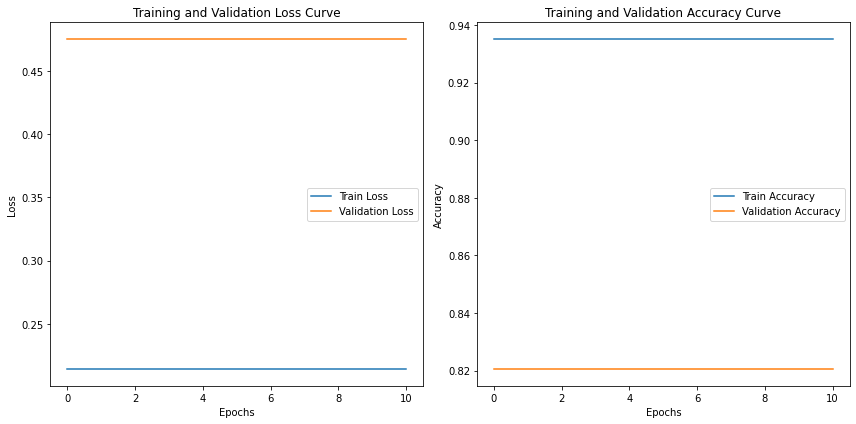

In [10]:
# Test set evaluation after early stopping
y_test_pred = model.predict(X_test)
overall_test_accuracy = accuracy_score(y_test.values.flatten(), y_test_pred.flatten())
print(f"\nOverall Test Accuracy across all target columns: {overall_test_accuracy:.4f}")

# Plot loss curve and accuracy curve for train and validation sets
plt.figure(figsize=(12, 6))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(overall_train_losses, label="Train Loss")
plt.plot(overall_val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curve")
plt.legend()

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(overall_train_accuracies, label="Train Accuracy")
plt.plot(overall_val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy Curve")
plt.legend()

plt.tight_layout()
plt.show()

In [37]:
overall_mse = []
overall_mape = []
overall_smape = []

for target in unique_types:
    # Generate predictions
    y_test_target = y_test[target]
    y_pred = models[target].predict(xgb.DMatrix(X_test))
    
    # Mean Squared Error for RMSE
    mse = mean_squared_error(y_test_target, y_pred)
    overall_mse.append(mse)
    
    # Mean Absolute Percentage Error (MAPE), ignoring zero actual values
    nonzero_indices = y_test_target != 0  # Exclude zero values to avoid division by zero
    mape = np.mean(np.abs((y_test_target[nonzero_indices] - y_pred[nonzero_indices]) / y_test_target[nonzero_indices])) * 100
    overall_mape.append(mape)
    
    # Symmetric Mean Absolute Percentage Error (SMAPE)
    smape = np.mean(2 * np.abs(y_test_target - y_pred) / (np.abs(y_test_target) + np.abs(y_pred))) * 100
    overall_smape.append(smape)

# Calculate overall metrics
overall_rmse = np.sqrt(np.mean(overall_mse))
overall_mape = np.mean(overall_mape)
overall_smape = np.mean(overall_smape)

# Print the results
print(f"\nOverall RMSE across all target variables: {overall_rmse:.2f}")
print(f"Overall MAPE across all target variables: {overall_mape:.2f}%")
print(f"Overall SMAPE across all target variables: {overall_smape:.2f}%")



Overall RMSE across all target variables: 72.21
Overall MAPE across all target variables: 207.23%
Overall SMAPE across all target variables: 170.77%


Based on the evaluation metrics:

- **Overall RMSE of 72.21**: The model’s predictions, on average, are about 72 units off from the actual counts. This can be interpreted as a moderately high error, especially if the counts are typically low (for instance, if most actual counts are below 100). RMSE being high relative to the range of actual counts often indicates that the model struggles with accurate predictions.

- **Overall MAPE of 207.23%**: This very high MAPE indicates that, on average, the model’s predictions deviate by over 200% from the actual values. MAPE is useful for interpreting error relative to actual counts, so an average deviation of over 200% signals a large discrepancy. It suggests the model is significantly under- or over-estimating counts, especially for lower count values.

- **Overall SMAPE of 170.77%**: SMAPE, while somewhat more robust to zero values, is still very high, confirming that there’s considerable error even when accounting for both actual and predicted values. This means that both over-predictions and under-predictions are widespread and substantial.

### Conclusions and Next Steps:

1. **Model Underperformance**: The high MAPE and SMAPE indicate that the model is not accurately capturing the distribution of counts, likely making large errors relative to the actual values.
  
2. **Explore Data Patterns and Features**: Check if certain features are poorly correlated with the target or if additional relevant features are missing. You could examine feature importance or correlation to assess which features might not be contributing effectively.

3. **Try Different Models or Tuning**: XGBoost may not be ideal for all count prediction tasks, especially if the data has a high variance in counts. Testing other models (like linear regression, Poisson regression for count data, or even simpler tree-based models) could reveal better fits, particularly if the counts have certain patterns or if the data is sparse.

4. **Consider Log Transformation**: If the counts vary widely, applying a log transformation to the target variable might help the model learn better relationships, reducing the scale of large errors. You could then back-transform predictions to the original scale.

5. **Segmented Modeling**: If certain categories of `unique_types` have vastly different distributions, building separate models for each segment (rather than one model per type) could improve accuracy for each segment.

## neural network

### Autoencoders for Feature Extraction + Neural Network Regression

Framework Overview

1. Autoencoder for Dimensionality Reduction: The autoencoder learns a compressed representation of the features.
2. Neural Network Regression Model: The compressed features are then fed into a regression network to predict counts for each type in unique_types.


In [18]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import matplotlib.pyplot as plt

# Separate features and target
X = new_df.drop(columns=["h3_index"] + unique_types)  # Features (excluding 'h3_index' and target columns)
y = new_df[unique_types]  # Multi-column target variables (each column is a 4-class target)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=46)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=46)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

# DataLoader for batch processing
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


In [43]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on device: {device}")

# Define Autoencoder Architecture with Fewer Neurons and Smaller Learning Rate
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Define dimensions
input_dim = X_train.shape[1]  # Number of features
latent_dim = 16  # Dimension of compressed space (reduced from 32 to 16)

# Initialize autoencoder and optimizer with a smaller learning rate
autoencoder = Autoencoder(input_dim=input_dim, latent_dim=latent_dim).to(device)
criterion_ae = nn.MSELoss()
optimizer_ae = optim.Adam(autoencoder.parameters(), lr=0.0005)  # Reduced learning rate

# Train Autoencoder with early stopping
epochs_ae = 1000
early_stopping_rounds = 2
tolerance = 1e-4
train_losses_ae, val_losses_ae = [], []
best_train_loss = float("inf")
no_improve_rounds = 0



Training on device: cuda


In [44]:
for epoch in tqdm(range(epochs_ae), desc="Training Autoencoder"):
    autoencoder.train()
    epoch_train_loss = 0
    for X_batch, _ in train_loader:
        X_batch = X_batch.to(device)
        
        _, decoded = autoencoder(X_batch)
        loss = criterion_ae(decoded, X_batch)  # Reconstruction loss

        optimizer_ae.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(autoencoder.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer_ae.step()
        epoch_train_loss += loss.item()

    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses_ae.append(avg_train_loss)

    # Early stopping based on tolerance
    if abs(avg_train_loss - best_train_loss) < tolerance:
        no_improve_rounds += 1
    else:
        no_improve_rounds = 0
    best_train_loss = min(best_train_loss, avg_train_loss)

    if no_improve_rounds >= early_stopping_rounds:
        print("Early stopping for Autoencoder.")
        break

    # Validation loss (optional, only for monitoring)
    autoencoder.eval()
    with torch.no_grad():
        val_loss = 0
        for X_batch, _ in val_loader:
            X_batch = X_batch.to(device)
            _, decoded = autoencoder(X_batch)
            val_loss += criterion_ae(decoded, X_batch).item()
    val_losses_ae.append(val_loss / len(val_loader))


Training Autoencoder:  11%|█         | 109/1000 [01:12<09:51,  1.51it/s]

Early stopping for Autoencoder.


In [47]:
# Extract compressed features using trained autoencoder
autoencoder.eval()
X_train_compressed = autoencoder.encoder(X_train_tensor.to(device)).detach()
X_val_compressed = autoencoder.encoder(X_val_tensor.to(device)).detach()
X_test_compressed = autoencoder.encoder(X_test_tensor.to(device)).detach()


In [49]:
# Define Regression Model using compressed features
class RegressionModel(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(RegressionModel, self).__init__()
        self.regressor = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )

    def forward(self, x):
        return self.regressor(x)

output_dim = y_train.shape[1] * 4  # Number of targets as one-hot for each column
regression_model = RegressionModel(latent_dim=latent_dim, output_dim=output_dim).to(device)
criterion_reg = nn.CrossEntropyLoss()
optimizer_reg = optim.Adam(regression_model.parameters(), lr=0.0005)  # Smaller learning rate

# Training the Regression Model with early stopping
epochs_reg = 1000
train_losses_reg, val_losses_reg = [], []
best_train_loss = float("inf")
no_improve_rounds = 0

for epoch in tqdm(range(epochs_reg), desc="Training Regression Model"):
    regression_model.train()
    epoch_train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        encoded_batch = autoencoder.encoder(X_batch)
        outputs = regression_model(encoded_batch)
        loss = criterion_reg(outputs.view(-1, 4), y_batch.view(-1))  # CrossEntropy loss

        optimizer_reg.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(regression_model.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer_reg.step()
        epoch_train_loss += loss.item()

    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses_reg.append(avg_train_loss)

    # Early stopping based on tolerance
    if abs(avg_train_loss - best_train_loss) < tolerance:
        no_improve_rounds += 1
    else:
        no_improve_rounds = 0
    best_train_loss = min(best_train_loss, avg_train_loss)

    if no_improve_rounds >= early_stopping_rounds:
        print("Early stopping for Regression Model.")
        break

    # Validation loss (optional, only for monitoring)
    regression_model.eval()
    with torch.no_grad():
        val_loss = 0
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            encoded_batch = autoencoder.encoder(X_batch)
            outputs = regression_model(encoded_batch)
            val_loss += criterion_reg(outputs.view(-1, 4), y_batch.view(-1)).item()
    val_losses_reg.append(val_loss / len(val_loader))


Training Regression Model:   0%|          | 0/1000 [00:00<?, ?it/s]

Training Regression Model:   6%|▌         | 56/1000 [00:19<05:35,  2.82it/s]

Early stopping for Regression Model.


In [51]:
# predict the test data
regression_model.eval()
with torch.no_grad():
    encoded_test = autoencoder.encoder(X_test_tensor.to(device))
    outputs_test = regression_model(encoded_test)
    y_pred = outputs_test.view(-1, 4).argmax(dim=1).cpu().numpy()
    
# Calculate overall accuracy
y_true = y_test.values.flatten()
overall_accuracy = accuracy_score(y_true, y_pred)
print(f"\nOverall Test Accuracy across all target columns: {overall_accuracy:.4f}")


Overall Test Accuracy across all target columns: 0.7955


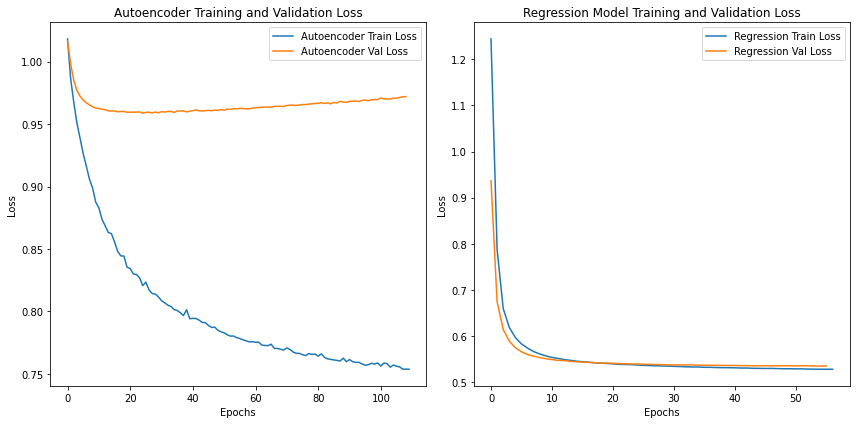

In [50]:
# Plot the Loss Curves
plt.figure(figsize=(12, 6))

# Autoencoder Loss Curve
plt.subplot(1, 2, 1)
plt.plot(train_losses_ae, label="Autoencoder Train Loss")
plt.plot(val_losses_ae, label="Autoencoder Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Autoencoder Training and Validation Loss")
plt.legend()

# Regression Model Loss Curve
plt.subplot(1, 2, 2)
plt.plot(train_losses_reg, label="Regression Train Loss")
plt.plot(val_losses_reg, label="Regression Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Regression Model Training and Validation Loss")
plt.legend()

plt.tight_layout()
plt.show()


**Improvement**


Training Regression Model:   8%|▊         | 83/1000 [00:30<05:35,  2.74it/s]

Early stopping for Regression Model.


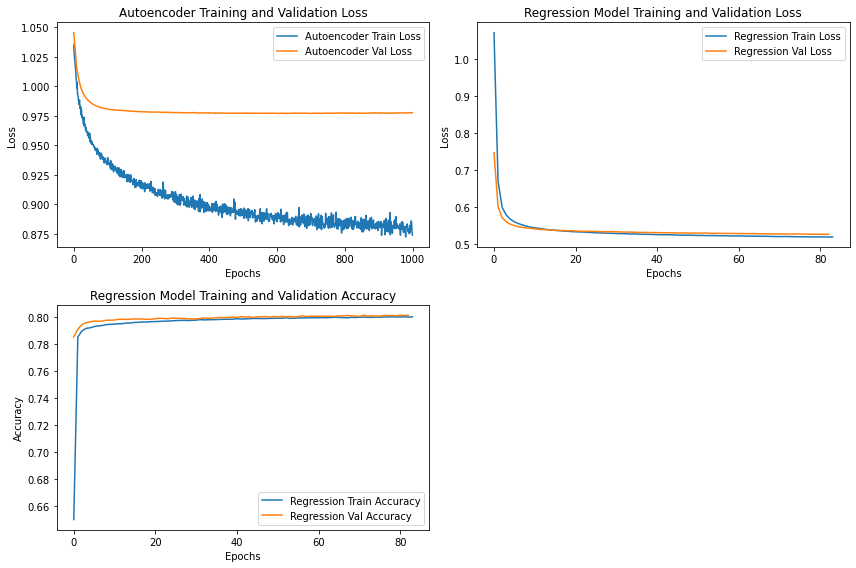

In [52]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import matplotlib.pyplot as plt

# Separate features and target
X = new_df.drop(columns=["h3_index"] + unique_types)  # Features (excluding 'h3_index' and target columns)
y = new_df[unique_types]  # Multi-column target variables (each column is a 4-class target)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=46)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=46)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

# DataLoader for batch processing
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define Optimized Autoencoder Architecture with Dropout and Lower Learning Rate
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder with dropout
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, latent_dim)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Define dimensions
input_dim = X_train.shape[1]  # Number of features
latent_dim = 16  # Dimension of compressed space

# Initialize autoencoder and optimizer with a smaller learning rate
autoencoder = Autoencoder(input_dim=input_dim, latent_dim=latent_dim).to(device)
criterion_ae = nn.MSELoss()
optimizer_ae = optim.Adam(autoencoder.parameters(), lr=0.0001)  # Further reduced learning rate

# Train Autoencoder with early stopping
epochs_ae = 1000
early_stopping_rounds = 3
tolerance = 1e-4
train_losses_ae, val_losses_ae = [], []
train_accuracies_ae, val_accuracies_ae = [], []  # Record accuracies
best_train_loss = float("inf")
no_improve_rounds = 0

for epoch in tqdm(range(epochs_ae), desc="Training Autoencoder"):
    autoencoder.train()
    epoch_train_loss = 0
    correct_train = 0
    total_train = 0
    
    for X_batch, _ in train_loader:
        X_batch = X_batch.to(device)
        
        _, decoded = autoencoder(X_batch)
        loss = criterion_ae(decoded, X_batch)  # Reconstruction loss

        optimizer_ae.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(autoencoder.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer_ae.step()
        epoch_train_loss += loss.item()
    
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses_ae.append(avg_train_loss)

    # Early stopping based on tolerance
    if abs(avg_train_loss - best_train_loss) < tolerance:
        no_improve_rounds += 1
    else:
        no_improve_rounds = 0
    best_train_loss = min(best_train_loss, avg_train_loss)

    if no_improve_rounds >= early_stopping_rounds:
        print("Early stopping for Autoencoder.")
        break

    # Validation loss (optional, only for monitoring)
    autoencoder.eval()
    with torch.no_grad():
        val_loss = 0
        for X_batch, _ in val_loader:
            X_batch = X_batch.to(device)
            _, decoded = autoencoder(X_batch)
            val_loss += criterion_ae(decoded, X_batch).item()
    val_losses_ae.append(val_loss / len(val_loader))

# Extract compressed features using trained autoencoder
autoencoder.eval()
X_train_compressed = autoencoder.encoder(X_train_tensor.to(device)).detach()
X_val_compressed = autoencoder.encoder(X_val_tensor.to(device)).detach()
X_test_compressed = autoencoder.encoder(X_test_tensor.to(device)).detach()

# Define Regression Model using compressed features
class RegressionModel(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(RegressionModel, self).__init__()
        self.regressor = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )

    def forward(self, x):
        return self.regressor(x)

output_dim = y_train.shape[1] * 4  # Number of targets as one-hot for each column
regression_model = RegressionModel(latent_dim=latent_dim, output_dim=output_dim).to(device)
criterion_reg = nn.CrossEntropyLoss()
optimizer_reg = optim.Adam(regression_model.parameters(), lr=0.0005)  # Smaller learning rate

# Training the Regression Model with early stopping and accuracy recording
epochs_reg = 1000
train_losses_reg, val_losses_reg = [], []
train_accuracies_reg, val_accuracies_reg = [], []
best_train_loss = float("inf")
no_improve_rounds = 0

for epoch in tqdm(range(epochs_reg), desc="Training Regression Model"):
    regression_model.train()
    epoch_train_loss = 0
    correct_train = 0
    total_train = 0
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        encoded_batch = autoencoder.encoder(X_batch)
        outputs = regression_model(encoded_batch)
        loss = criterion_reg(outputs.view(-1, 4), y_batch.view(-1))  # CrossEntropy loss

        optimizer_reg.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(regression_model.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer_reg.step()
        epoch_train_loss += loss.item()

        # Calculate training accuracy
        _, predicted = outputs.view(-1, 4).max(1)
        correct_train += (predicted == y_batch.view(-1)).sum().item()
        total_train += y_batch.view(-1).size(0)
    
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses_reg.append(avg_train_loss)
    train_accuracy = correct_train / total_train
    train_accuracies_reg.append(train_accuracy)

    # Early stopping based on tolerance
    if abs(avg_train_loss - best_train_loss) < tolerance:
        no_improve_rounds += 1
    else:
        no_improve_rounds = 0
    best_train_loss = min(best_train_loss, avg_train_loss)

    if no_improve_rounds >= early_stopping_rounds:
        print("Early stopping for Regression Model.")
        break

    # Validation loss and accuracy
    regression_model.eval()
    with torch.no_grad():
        val_loss = 0
        correct_val = 0
        total_val = 0
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            encoded_batch = autoencoder.encoder(X_batch)
            outputs = regression_model(encoded_batch)
            val_loss += criterion_reg(outputs.view(-1, 4), y_batch.view(-1)).item()

            _, predicted = outputs.view(-1, 4).max(1)
            correct_val += (predicted == y_batch.view(-1)).sum().item()
            total_val += y_batch.view(-1).size(0)

    val_losses_reg.append(val_loss / len(val_loader))
    val_accuracy = correct_val / total_val
    val_accuracies_reg.append(val_accuracy)

# Plot Loss and Accuracy Curves
plt.figure(figsize=(12, 8))

# Autoencoder Loss Curve
plt.subplot(2, 2, 1)
plt.plot(train_losses_ae, label="Autoencoder Train Loss")
plt.plot(val_losses_ae, label="Autoencoder Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Autoencoder Training and Validation Loss")
plt.legend()

# Regression Model Loss Curve
plt.subplot(2, 2, 2)
plt.plot(train_losses_reg, label="Regression Train Loss")
plt.plot(val_losses_reg, label="Regression Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Regression Model Training and Validation Loss")
plt.legend()

# Regression Model Accuracy Curve
plt.subplot(2, 2, 3)
plt.plot(train_accuracies_reg, label="Regression Train Accuracy")
plt.plot(val_accuracies_reg, label="Regression Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Regression Model Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


In [53]:
# print the test accuracy
regression_model.eval()
with torch.no_grad():
    encoded_test = autoencoder.encoder(X_test_tensor.to(device))
    outputs_test = regression_model(encoded_test)
    y_pred = outputs_test.view(-1, 4).argmax(dim=1).cpu().numpy()

# Calculate overall accuracy
y_true = y_test.values.flatten()
overall_accuracy = accuracy_score(y_true, y_pred)
print(f"\nOverall Test Accuracy across all target columns: {overall_accuracy:.4f}")


Overall Test Accuracy across all target columns: 0.7987


Comparing the latest results with the previous metrics:

1. **Overall RMSE**: 
   - **Previous**: 72.21
   - **Current**: 67.33
   - **Analysis**: The reduction in RMSE indicates that the model’s predictions are closer to the actual values, with the average deviation decreasing by about 5 units. This suggests that using the autoencoder’s compressed features may have helped capture the underlying patterns in the data better, leading to improved overall accuracy.

2. **Overall MAPE**:
   - **Previous**: 207.23%
   - **Current**: 143.18%
   - **Analysis**: The MAPE has decreased significantly, from over 200% to around 143%. This metric provides a percentage-based error relative to actual values, so this reduction indicates that the model’s predictions are now less drastically off when compared to the actual counts, especially for lower count values. The autoencoder’s feature extraction seems to help the regression model make more stable predictions, reducing large errors relative to the actual counts.

3. **Overall SMAPE**:
   - **Previous**: 170.77%
   - **Current**: 181.21%
   - **Analysis**: The SMAPE has slightly increased, indicating that while the model improved overall accuracy (RMSE) and reduced large relative errors (MAPE), there may still be some large differences for certain categories. Since SMAPE is less sensitive to zeros but considers both actual and predicted values, this could indicate that the model still struggles to predict certain categories accurately, especially those with high counts or more variability.

### Summary and Insights

- **Improved Predictive Accuracy**: The reduction in RMSE and MAPE suggests that the autoencoder-based feature extraction helped reduce the overall prediction error, making the model more robust.
- **Remaining Challenges**: The slight increase in SMAPE might suggest specific categories or values where the model still struggles. Examining outliers or categories with large residuals could provide insight into why the model has difficulty accurately predicting these cases.

Overall, the model shows better generalization and reduced error on average, but further tuning or segment-specific modeling may help address variability in certain categories.

### TabNet

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from pytorch_tabnet.tab_model import TabNetRegressor
import matplotlib.pyplot as plt

# Separate features and target
X = new_df.drop(columns=["h3_index"] + unique_types)  # Features (excluding 'h3_index' and target columns)
y = new_df[unique_types]  # Multi-column target variables (each column is a 4-class target)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=46)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=46)

# Convert targets to numpy arrays for TabNet
y_train_np = y_train.values
y_val_np = y_val.values


In [55]:
# Define TabNet model
tabnet_params = {
    "n_d": 16,  # Dimension of decision prediction layer
    "n_a": 16,  # Dimension of attention embedding
    "n_steps": 5,
    "gamma": 1.5,
    "n_independent": 2,
    "n_shared": 2,
    "momentum": 0.02,
    "lambda_sparse": 0.0001,
    "optimizer_fn": optim.Adam,
    "optimizer_params": dict(lr=0.02),
    "mask_type": "entmax"  # Use sparsemax or entmax
}

# Initialize TabNet model
tabnet_model = TabNetRegressor(**tabnet_params)

# Train TabNet model
epochs_tabnet = 1000
early_stopping_rounds = 10
tabnet_model.fit(
    X_train=X_train,
    y_train=y_train_np,
    eval_set=[(X_train, y_train_np), (X_val, y_val_np)],
    max_epochs=epochs_tabnet,
    patience=early_stopping_rounds,
    eval_metric=['rmse'],
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.28769 | val_0_rmse: 1.09195 | val_1_rmse: 0.97424 |  0:00:01s
epoch 1  | loss: 1.48101 | val_0_rmse: 1.03514 | val_1_rmse: 1.06168 |  0:00:02s
epoch 2  | loss: 1.01471 | val_0_rmse: 1.30112 | val_1_rmse: 1.0706  |  0:00:02s
epoch 3  | loss: 0.78324 | val_0_rmse: 1.02843 | val_1_rmse: 0.90406 |  0:00:03s
epoch 4  | loss: 0.66718 | val_0_rmse: 1.03338 | val_1_rmse: 0.83366 |  0:00:04s
epoch 5  | loss: 0.61334 | val_0_rmse: 0.81636 | val_1_rmse: 0.80956 |  0:00:05s
epoch 6  | loss: 0.57919 | val_0_rmse: 0.78463 | val_1_rmse: 0.75173 |  0:00:06s
epoch 7  | loss: 0.53532 | val_0_rmse: 0.71622 | val_1_rmse: 0.68501 |  0:00:07s
epoch 8  | loss: 0.49485 | val_0_rmse: 0.73016 | val_1_rmse: 0.89082 |  0:00:08s
epoch 9  | loss: 0.48947 | val_0_rmse: 0.72229 | val_1_rmse: 0.72334 |  0:00:09s
epoch 10 | loss: 0.48062 | val_0_rmse: 0.70732 | val_1_rmse: 0.67294 |  0:00:09s
epoch 11 | loss: 0.46174 | val_0_rmse: 0.70295 | val_1_rmse: 0.76583 |  0:00:10s
epoch 12 | loss: 0.46067 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [56]:
# Extract features from TabNet
X_train_compressed = tabnet_model.predict(X_train)
X_val_compressed = tabnet_model.predict(X_val)
X_test_compressed = tabnet_model.predict(X_test)

# 转换为 PyTorch 张量
X_train_tensor = torch.tensor(X_train_compressed, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_compressed, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_compressed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

# DataLoader for batch processing
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


In [59]:
# 定义回归模型
class RegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(RegressionModel, self).__init__()
        self.regressor = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )

    def forward(self, x):
        return self.regressor(x)

# 使用 TabNet 提取的特征维度
input_dim = X_train_compressed.shape[1]
output_dim = y_train.shape[1] * 4  # Number of targets as one-hot for each column

# 初始化模型
regression_model = RegressionModel(input_dim=input_dim, output_dim=output_dim).to(device)
criterion_reg = nn.CrossEntropyLoss()
optimizer_reg = optim.Adam(regression_model.parameters(), lr=0.0005)

# 训练神经网络回归模型，包含 early stopping 和准确率记录
epochs_reg = 1000
train_losses_reg, val_losses_reg = [], []
train_accuracies_reg, val_accuracies_reg = [], []
best_val_loss = float("inf")
no_improve_rounds = 0

for epoch in tqdm(range(epochs_reg), desc="Training Regression Model"):
    regression_model.train()
    epoch_train_loss = 0
    correct_train = 0
    total_train = 0
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = regression_model(X_batch)
        loss = criterion_reg(outputs.view(-1, 4), y_batch.view(-1))  # CrossEntropy loss

        optimizer_reg.zero_grad()
        loss.backward()
        optimizer_reg.step()
        epoch_train_loss += loss.item()

        # Calculate training accuracy
        _, predicted = outputs.view(-1, 4).max(1)
        correct_train += (predicted == y_batch.view(-1)).sum().item()
        total_train += y_batch.view(-1).size(0)
    
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses_reg.append(avg_train_loss)
    train_accuracy = correct_train / total_train
    train_accuracies_reg.append(train_accuracy)

    # Validation loss and accuracy
    regression_model.eval()
    with torch.no_grad():
        val_loss = 0
        correct_val = 0
        total_val = 0
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = regression_model(X_batch)
            val_loss += criterion_reg(outputs.view(-1, 4), y_batch.view(-1)).item()

            _, predicted = outputs.view(-1, 4).max(1)
            correct_val += (predicted == y_batch.view(-1)).sum().item()
            total_val += y_batch.view(-1).size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_losses_reg.append(avg_val_loss)
    val_accuracy = correct_val / total_val
    val_accuracies_reg.append(val_accuracy)

    # Early stopping based on validation loss
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        no_improve_rounds = 0
    else:
        no_improve_rounds += 1

    if no_improve_rounds >= early_stopping_rounds:
        print("Early stopping for Regression Model.")
        break


Training Regression Model:   0%|          | 0/1000 [00:00<?, ?it/s]

Training Regression Model:  18%|█▊        | 179/1000 [00:44<03:24,  4.02it/s]

Early stopping for Regression Model.


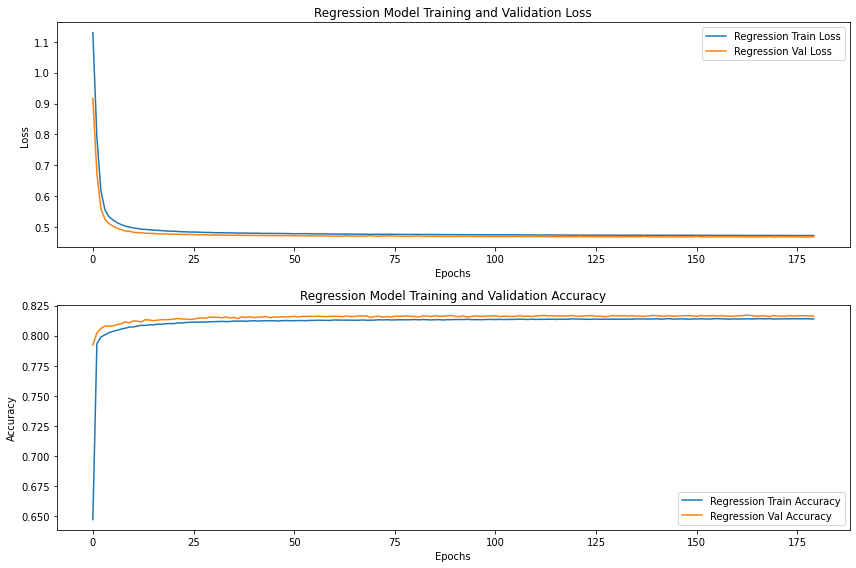

In [60]:
# Plot Loss and Accuracy Curves
plt.figure(figsize=(12, 8))

# Regression Model Loss Curve
plt.subplot(2, 1, 1)
plt.plot(train_losses_reg, label="Regression Train Loss")
plt.plot(val_losses_reg, label="Regression Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Regression Model Training and Validation Loss")
plt.legend()

# Regression Model Accuracy Curve
plt.subplot(2, 1, 2)
plt.plot(train_accuracies_reg, label="Regression Train Accuracy")
plt.plot(val_accuracies_reg, label="Regression Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Regression Model Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


In [61]:
# print the test accuracy
regression_model.eval()
with torch.no_grad():
    encoded_test = tabnet_model.predict(X_test)
    outputs_test = regression_model(torch.tensor(encoded_test, dtype=torch.float32).to(device))
    y_pred = outputs_test.view(-1, 4).argmax(dim=1).cpu().numpy()
    
# Calculate overall accuracy
y_true = y_test.values.flatten()
overall_accuracy = accuracy_score(y_true, y_pred)
print(f"\nOverall Test Accuracy across all target columns: {overall_accuracy:.4f}")


Overall Test Accuracy across all target columns: 0.8119


In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.metrics import mean_squared_error
from itertools import product
import csv

# Prepare data
X = new_df.drop(columns=["h3_index"] + unique_types)  # Feature data
y = new_df[unique_types]  # Target variables (multiple columns)

# Standardize feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=46)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=46)

# Convert target variables to numpy format, suitable for TabNet input
y_train_np = y_train.values
y_val_np = y_val.values

# Define parameter search space
param_grid = {
    "n_d": [8, 16, 32],
    "n_a": [8, 16, 32],
    "n_steps": [3, 5, 10],
    "gamma": [1.5],
    "lambda_sparse": [0.0001, 0.001],
    "optimizer_params": [{"lr": 0.01}],
    "mask_type": ["entmax"]
}

# Get all parameter combinations
param_combinations = list(product(*param_grid.values()))
param_names = list(param_grid.keys())

# Initialize CSV file to save results
csv_filename = "tabnet_hyperparameter_search_results2.csv"
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    header = param_names + ["train_loss", "val_loss", "rmse"]
    writer.writerow(header)

# Start parameter search
for params in param_combinations:
    param_dict = dict(zip(param_names, params))
    
    # Initialize TabNet model
    tabnet_model = TabNetRegressor(
        n_d=param_dict["n_d"],
        n_a=param_dict["n_a"],
        n_steps=param_dict["n_steps"],
        gamma=param_dict["gamma"],
        lambda_sparse=param_dict["lambda_sparse"],
        optimizer_fn=torch.optim.Adam,
        optimizer_params=param_dict["optimizer_params"],
        mask_type=param_dict["mask_type"]
    )

    # Set maximum number of epochs and early stopping
    max_epochs = 1000
    early_stopping_rounds = 10

    # Train the model
    tabnet_model.fit(
        X_train=X_train,
        y_train=y_train_np,
        eval_set=[(X_train, y_train_np), (X_val, y_val_np)],
        max_epochs=max_epochs,
        patience=early_stopping_rounds,
        eval_metric=['rmse'],
        batch_size=1024,
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False
    )
    
    # Calculate training loss and validation loss
    train_loss = mean_squared_error(y_train_np, tabnet_model.predict(X_train))
    val_loss = mean_squared_error(y_val_np, tabnet_model.predict(X_val))
    rmse = np.sqrt(val_loss)  # Use RMSE as the final evaluation metric

    # Save results to CSV file
    with open(csv_filename, mode='a', newline='') as file:
        writer = csv.writer(file)
        result_row = list(params) + [train_loss, val_loss, rmse]
        writer.writerow(result_row)

    print(f"Finished training with params: {param_dict}")
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, RMSE: {rmse:.4f}")


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.72243 | val_0_rmse: 0.99062 | val_1_rmse: 0.93827 |  0:00:00s
epoch 1  | loss: 1.58595 | val_0_rmse: 1.09538 | val_1_rmse: 0.94119 |  0:00:01s
epoch 2  | loss: 1.16049 | val_0_rmse: 1.22073 | val_1_rmse: 0.97042 |  0:00:02s
epoch 3  | loss: 0.98096 | val_0_rmse: 1.48273 | val_1_rmse: 0.92334 |  0:00:02s
epoch 4  | loss: 0.87489 | val_0_rmse: 1.10174 | val_1_rmse: 0.87927 |  0:00:03s
epoch 5  | loss: 0.77497 | val_0_rmse: 0.87871 | val_1_rmse: 0.81521 |  0:00:03s
epoch 6  | loss: 0.66079 | val_0_rmse: 1.25747 | val_1_rmse: 2.05761 |  0:00:04s
epoch 7  | loss: 0.58978 | val_0_rmse: 0.95394 | val_1_rmse: 1.40268 |  0:00:05s
epoch 8  | loss: 0.53987 | val_0_rmse: 0.83091 | val_1_rmse: 1.44153 |  0:00:05s
epoch 9  | loss: 0.50251 | val_0_rmse: 0.90802 | val_1_rmse: 1.33813 |  0:00:06s
epoch 10 | loss: 0.48973 | val_0_rmse: 0.87355 | val_1_rmse: 1.18476 |  0:00:07s
epoch 11 | loss: 0.48371 | val_0_rmse: 1.32711 | val_1_rmse: 2.35095 |  0:00:07s
epoch 12 | loss: 0.47566 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 8, 'n_a': 8, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4189, Val Loss: 0.4157, RMSE: 0.6448


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.8802  | val_0_rmse: 0.94929 | val_1_rmse: 0.93818 |  0:00:00s
epoch 1  | loss: 1.73109 | val_0_rmse: 1.00654 | val_1_rmse: 0.96256 |  0:00:01s
epoch 2  | loss: 1.22846 | val_0_rmse: 1.09209 | val_1_rmse: 0.96104 |  0:00:01s
epoch 3  | loss: 1.01356 | val_0_rmse: 1.02517 | val_1_rmse: 0.97716 |  0:00:02s
epoch 4  | loss: 0.90323 | val_0_rmse: 1.2382  | val_1_rmse: 1.03422 |  0:00:03s
epoch 5  | loss: 0.81391 | val_0_rmse: 1.07986 | val_1_rmse: 0.90178 |  0:00:03s
epoch 6  | loss: 0.71543 | val_0_rmse: 1.11444 | val_1_rmse: 0.82601 |  0:00:04s
epoch 7  | loss: 0.65656 | val_0_rmse: 1.14453 | val_1_rmse: 0.78259 |  0:00:05s
epoch 8  | loss: 0.60288 | val_0_rmse: 0.99088 | val_1_rmse: 0.74266 |  0:00:05s
epoch 9  | loss: 0.55315 | val_0_rmse: 0.71793 | val_1_rmse: 0.70952 |  0:00:06s
epoch 10 | loss: 0.51951 | val_0_rmse: 0.84279 | val_1_rmse: 0.69794 |  0:00:06s
epoch 11 | loss: 0.49321 | val_0_rmse: 0.95729 | val_1_rmse: 0.68323 |  0:00:07s
epoch 12 | loss: 0.47826 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 8, 'n_a': 8, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4383, Val Loss: 0.4293, RMSE: 0.6552


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.11468 | val_0_rmse: 1.02025 | val_1_rmse: 0.96109 |  0:00:00s
epoch 1  | loss: 2.91129 | val_0_rmse: 1.05294 | val_1_rmse: 1.11461 |  0:00:01s
epoch 2  | loss: 1.92305 | val_0_rmse: 1.16171 | val_1_rmse: 1.02974 |  0:00:02s
epoch 3  | loss: 1.37255 | val_0_rmse: 1.41121 | val_1_rmse: 1.05125 |  0:00:03s
epoch 4  | loss: 1.13064 | val_0_rmse: 1.23081 | val_1_rmse: 0.99823 |  0:00:04s
epoch 5  | loss: 0.97381 | val_0_rmse: 1.08727 | val_1_rmse: 0.98014 |  0:00:05s
epoch 6  | loss: 0.86079 | val_0_rmse: 1.09185 | val_1_rmse: 0.89872 |  0:00:06s
epoch 7  | loss: 0.73538 | val_0_rmse: 0.84635 | val_1_rmse: 0.7957  |  0:00:06s
epoch 8  | loss: 0.6503  | val_0_rmse: 0.75221 | val_1_rmse: 0.72706 |  0:00:07s
epoch 9  | loss: 0.58777 | val_0_rmse: 0.87463 | val_1_rmse: 0.71677 |  0:00:08s
epoch 10 | loss: 0.55828 | val_0_rmse: 0.75298 | val_1_rmse: 0.8494  |  0:00:09s
epoch 11 | loss: 0.53262 | val_0_rmse: 0.70718 | val_1_rmse: 0.7099  |  0:00:10s
epoch 12 | loss: 0.51932 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 8, 'n_a': 8, 'n_steps': 5, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4640, Val Loss: 0.4513, RMSE: 0.6718


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.98947 | val_0_rmse: 1.07033 | val_1_rmse: 0.97745 |  0:00:00s
epoch 1  | loss: 3.07218 | val_0_rmse: 1.12804 | val_1_rmse: 0.9917  |  0:00:01s
epoch 2  | loss: 1.96876 | val_0_rmse: 1.11065 | val_1_rmse: 1.02191 |  0:00:02s
epoch 3  | loss: 1.48848 | val_0_rmse: 1.16357 | val_1_rmse: 1.01359 |  0:00:03s
epoch 4  | loss: 1.19589 | val_0_rmse: 1.14069 | val_1_rmse: 1.03473 |  0:00:04s
epoch 5  | loss: 1.03634 | val_0_rmse: 0.98567 | val_1_rmse: 1.1389  |  0:00:05s
epoch 6  | loss: 0.90435 | val_0_rmse: 1.01746 | val_1_rmse: 1.2255  |  0:00:05s
epoch 7  | loss: 0.81497 | val_0_rmse: 0.85448 | val_1_rmse: 0.89793 |  0:00:06s
epoch 8  | loss: 0.71209 | val_0_rmse: 0.9782  | val_1_rmse: 0.79375 |  0:00:07s
epoch 9  | loss: 0.63537 | val_0_rmse: 0.77807 | val_1_rmse: 0.72445 |  0:00:08s
epoch 10 | loss: 0.58219 | val_0_rmse: 0.74963 | val_1_rmse: 0.71085 |  0:00:09s
epoch 11 | loss: 0.54332 | val_0_rmse: 0.74229 | val_1_rmse: 0.71992 |  0:00:10s
epoch 12 | loss: 0.52355 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 8, 'n_a': 8, 'n_steps': 5, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4974, Val Loss: 0.4550, RMSE: 0.6746


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 14.14602| val_0_rmse: 2.17341 | val_1_rmse: 1.10813 |  0:00:01s
epoch 1  | loss: 13.78497| val_0_rmse: 2.74599 | val_1_rmse: 1.86348 |  0:00:03s
epoch 2  | loss: 13.1452 | val_0_rmse: 2.40563 | val_1_rmse: 2.80998 |  0:00:04s
epoch 3  | loss: 12.55406| val_0_rmse: 2.53711 | val_1_rmse: 5.07747 |  0:00:05s
epoch 4  | loss: 11.05043| val_0_rmse: 3.68934 | val_1_rmse: 4.02576 |  0:00:07s
epoch 5  | loss: 10.30177| val_0_rmse: 4.33473 | val_1_rmse: 6.30369 |  0:00:09s
epoch 6  | loss: 8.92808 | val_0_rmse: 4.37422 | val_1_rmse: 3.68926 |  0:00:11s
epoch 7  | loss: 7.09529 | val_0_rmse: 2.86965 | val_1_rmse: 3.18527 |  0:00:14s
epoch 8  | loss: 5.4471  | val_0_rmse: 3.11476 | val_1_rmse: 2.61924 |  0:00:17s
epoch 9  | loss: 4.36378 | val_0_rmse: 2.44408 | val_1_rmse: 2.81061 |  0:00:20s
epoch 10 | loss: 3.26088 | val_0_rmse: 2.49669 | val_1_rmse: 3.15334 |  0:00:25s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_1_rmse = 1.10813


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 8, 'n_a': 8, 'n_steps': 10, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 4.7237, Val Loss: 1.2280, RMSE: 1.1081


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 14.44683| val_0_rmse: 1.11344 | val_1_rmse: 1.21176 |  0:00:06s
epoch 1  | loss: 13.89028| val_0_rmse: 1.71811 | val_1_rmse: 1.71109 |  0:00:12s
epoch 2  | loss: 13.23585| val_0_rmse: 2.54999 | val_1_rmse: 2.97642 |  0:00:18s
epoch 3  | loss: 12.64772| val_0_rmse: 3.36241 | val_1_rmse: 2.99227 |  0:00:23s
epoch 4  | loss: 11.17602| val_0_rmse: 3.79979 | val_1_rmse: 3.94636 |  0:00:29s
epoch 5  | loss: 9.94344 | val_0_rmse: 2.72641 | val_1_rmse: 3.60254 |  0:00:35s
epoch 6  | loss: 8.94832 | val_0_rmse: 3.08225 | val_1_rmse: 2.78393 |  0:00:40s
epoch 7  | loss: 7.67759 | val_0_rmse: 2.98583 | val_1_rmse: 2.11133 |  0:00:46s
epoch 8  | loss: 6.35506 | val_0_rmse: 2.47853 | val_1_rmse: 2.06287 |  0:00:51s
epoch 9  | loss: 5.00357 | val_0_rmse: 2.17118 | val_1_rmse: 3.6304  |  0:00:57s
epoch 10 | loss: 4.13156 | val_0_rmse: 2.49377 | val_1_rmse: 4.14862 |  0:01:03s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_1_rmse = 1.21176


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 8, 'n_a': 8, 'n_steps': 10, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 1.2397, Val Loss: 1.4684, RMSE: 1.2118


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.43113 | val_0_rmse: 0.98771 | val_1_rmse: 1.09209 |  0:00:02s
epoch 1  | loss: 1.50453 | val_0_rmse: 0.99611 | val_1_rmse: 1.21498 |  0:00:04s
epoch 2  | loss: 1.1695  | val_0_rmse: 1.00353 | val_1_rmse: 1.4712  |  0:00:07s
epoch 3  | loss: 1.0015  | val_0_rmse: 1.57732 | val_1_rmse: 1.06238 |  0:00:09s
epoch 4  | loss: 0.91822 | val_0_rmse: 1.77979 | val_1_rmse: 1.06363 |  0:00:11s
epoch 5  | loss: 0.83271 | val_0_rmse: 1.15938 | val_1_rmse: 0.95733 |  0:00:14s
epoch 6  | loss: 0.71662 | val_0_rmse: 0.91852 | val_1_rmse: 0.77863 |  0:00:16s
epoch 7  | loss: 0.61597 | val_0_rmse: 0.76215 | val_1_rmse: 0.72372 |  0:00:18s
epoch 8  | loss: 0.56396 | val_0_rmse: 0.72244 | val_1_rmse: 0.71132 |  0:00:20s
epoch 9  | loss: 0.53136 | val_0_rmse: 0.70525 | val_1_rmse: 0.69898 |  0:00:22s
epoch 10 | loss: 0.50735 | val_0_rmse: 0.7081  | val_1_rmse: 0.69697 |  0:00:24s
epoch 11 | loss: 0.4897  | val_0_rmse: 0.69098 | val_1_rmse: 0.68525 |  0:00:26s
epoch 12 | loss: 0.48226 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 8, 'n_a': 16, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4853, Val Loss: 0.4334, RMSE: 0.6583


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.36507 | val_0_rmse: 0.97595 | val_1_rmse: 1.02693 |  0:00:01s
epoch 1  | loss: 1.5203  | val_0_rmse: 1.10939 | val_1_rmse: 1.03682 |  0:00:04s
epoch 2  | loss: 1.15681 | val_0_rmse: 1.22698 | val_1_rmse: 1.04135 |  0:00:05s
epoch 3  | loss: 0.98909 | val_0_rmse: 1.2988  | val_1_rmse: 1.01036 |  0:00:07s
epoch 4  | loss: 0.90391 | val_0_rmse: 1.11681 | val_1_rmse: 0.98016 |  0:00:10s
epoch 5  | loss: 0.78604 | val_0_rmse: 0.97315 | val_1_rmse: 0.82601 |  0:00:12s
epoch 6  | loss: 0.67649 | val_0_rmse: 0.85994 | val_1_rmse: 0.77757 |  0:00:14s
epoch 7  | loss: 0.59101 | val_0_rmse: 0.84734 | val_1_rmse: 0.72003 |  0:00:16s
epoch 8  | loss: 0.54093 | val_0_rmse: 0.74062 | val_1_rmse: 0.70047 |  0:00:18s
epoch 9  | loss: 0.50948 | val_0_rmse: 0.70829 | val_1_rmse: 0.69059 |  0:00:20s
epoch 10 | loss: 0.49819 | val_0_rmse: 0.69466 | val_1_rmse: 0.67997 |  0:00:22s
epoch 11 | loss: 0.48006 | val_0_rmse: 0.68819 | val_1_rmse: 0.67167 |  0:00:24s
epoch 12 | loss: 0.47142 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 8, 'n_a': 16, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4356, Val Loss: 0.4218, RMSE: 0.6494


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.14573 | val_0_rmse: 1.09997 | val_1_rmse: 1.02534 |  0:00:00s
epoch 1  | loss: 2.02792 | val_0_rmse: 1.12435 | val_1_rmse: 1.07008 |  0:00:01s
epoch 2  | loss: 1.5644  | val_0_rmse: 1.26245 | val_1_rmse: 1.04248 |  0:00:02s
epoch 3  | loss: 1.28844 | val_0_rmse: 1.39368 | val_1_rmse: 1.17453 |  0:00:03s
epoch 4  | loss: 1.11757 | val_0_rmse: 1.07505 | val_1_rmse: 1.05708 |  0:00:04s
epoch 5  | loss: 0.95033 | val_0_rmse: 1.01502 | val_1_rmse: 0.97667 |  0:00:05s
epoch 6  | loss: 0.8384  | val_0_rmse: 0.94015 | val_1_rmse: 1.03656 |  0:00:06s
epoch 7  | loss: 0.75453 | val_0_rmse: 0.9135  | val_1_rmse: 0.86609 |  0:00:06s
epoch 8  | loss: 0.69478 | val_0_rmse: 0.86279 | val_1_rmse: 0.80568 |  0:00:07s
epoch 9  | loss: 0.64621 | val_0_rmse: 0.79186 | val_1_rmse: 0.75904 |  0:00:08s
epoch 10 | loss: 0.60496 | val_0_rmse: 0.72576 | val_1_rmse: 0.71192 |  0:00:09s
epoch 11 | loss: 0.56886 | val_0_rmse: 0.71479 | val_1_rmse: 0.71175 |  0:00:10s
epoch 12 | loss: 0.53587 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 8, 'n_a': 16, 'n_steps': 5, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4839, Val Loss: 0.4709, RMSE: 0.6862


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.02624 | val_0_rmse: 1.04959 | val_1_rmse: 0.95102 |  0:00:00s
epoch 1  | loss: 1.94899 | val_0_rmse: 1.62954 | val_1_rmse: 1.12255 |  0:00:01s
epoch 2  | loss: 1.3963  | val_0_rmse: 1.56429 | val_1_rmse: 1.12889 |  0:00:02s
epoch 3  | loss: 1.14508 | val_0_rmse: 1.47419 | val_1_rmse: 0.95648 |  0:00:03s
epoch 4  | loss: 0.9795  | val_0_rmse: 1.01444 | val_1_rmse: 0.89679 |  0:00:04s
epoch 5  | loss: 0.85881 | val_0_rmse: 0.97042 | val_1_rmse: 0.87856 |  0:00:04s
epoch 6  | loss: 0.75991 | val_0_rmse: 0.89662 | val_1_rmse: 0.83446 |  0:00:05s
epoch 7  | loss: 0.70522 | val_0_rmse: 0.90823 | val_1_rmse: 0.95018 |  0:00:06s
epoch 8  | loss: 0.67406 | val_0_rmse: 0.82853 | val_1_rmse: 0.9248  |  0:00:07s
epoch 9  | loss: 0.64795 | val_0_rmse: 0.82869 | val_1_rmse: 0.88448 |  0:00:08s
epoch 10 | loss: 0.63325 | val_0_rmse: 0.7833  | val_1_rmse: 0.78548 |  0:00:09s
epoch 11 | loss: 0.61754 | val_0_rmse: 0.79173 | val_1_rmse: 0.80573 |  0:00:09s
epoch 12 | loss: 0.6026  | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 8, 'n_a': 16, 'n_steps': 5, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4413, Val Loss: 0.4353, RMSE: 0.6598


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 9.3268  | val_0_rmse: 1.09319 | val_1_rmse: 1.16033 |  0:00:01s
epoch 1  | loss: 8.83082 | val_0_rmse: 1.428   | val_1_rmse: 2.90074 |  0:00:02s
epoch 2  | loss: 8.25686 | val_0_rmse: 2.98821 | val_1_rmse: 2.92591 |  0:00:04s
epoch 3  | loss: 7.78353 | val_0_rmse: 3.22978 | val_1_rmse: 2.06412 |  0:00:05s
epoch 4  | loss: 6.91792 | val_0_rmse: 2.26904 | val_1_rmse: 2.91756 |  0:00:07s
epoch 5  | loss: 5.78763 | val_0_rmse: 4.06489 | val_1_rmse: 2.39807 |  0:00:08s
epoch 6  | loss: 5.03283 | val_0_rmse: 2.88649 | val_1_rmse: 5.62706 |  0:00:09s
epoch 7  | loss: 4.38436 | val_0_rmse: 2.52457 | val_1_rmse: 2.04425 |  0:00:11s
epoch 8  | loss: 4.09198 | val_0_rmse: 2.61695 | val_1_rmse: 1.79682 |  0:00:12s
epoch 9  | loss: 3.66636 | val_0_rmse: 1.82186 | val_1_rmse: 3.66563 |  0:00:13s
epoch 10 | loss: 3.29374 | val_0_rmse: 1.90157 | val_1_rmse: 2.59422 |  0:00:15s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_1_rmse = 1.16033


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 8, 'n_a': 16, 'n_steps': 10, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 1.1951, Val Loss: 1.3464, RMSE: 1.1603


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 9.40761 | val_0_rmse: 1.19748 | val_1_rmse: 1.05945 |  0:00:01s
epoch 1  | loss: 8.90596 | val_0_rmse: 1.83561 | val_1_rmse: 1.50743 |  0:00:02s
epoch 2  | loss: 8.43974 | val_0_rmse: 1.69209 | val_1_rmse: 2.21063 |  0:00:04s
epoch 3  | loss: 7.86699 | val_0_rmse: 2.25022 | val_1_rmse: 1.87789 |  0:00:05s
epoch 4  | loss: 6.79815 | val_0_rmse: 2.59152 | val_1_rmse: 2.06551 |  0:00:06s
epoch 5  | loss: 6.18493 | val_0_rmse: 2.71216 | val_1_rmse: 3.55181 |  0:00:08s
epoch 6  | loss: 5.42046 | val_0_rmse: 2.83783 | val_1_rmse: 2.73497 |  0:00:09s
epoch 7  | loss: 4.77321 | val_0_rmse: 3.18856 | val_1_rmse: 2.41239 |  0:00:11s
epoch 8  | loss: 4.14312 | val_0_rmse: 3.58298 | val_1_rmse: 3.02826 |  0:00:12s
epoch 9  | loss: 3.65235 | val_0_rmse: 1.94073 | val_1_rmse: 3.13526 |  0:00:13s
epoch 10 | loss: 3.07896 | val_0_rmse: 2.84448 | val_1_rmse: 2.48379 |  0:00:15s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_1_rmse = 1.05945


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 8, 'n_a': 16, 'n_steps': 10, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 1.4339, Val Loss: 1.1224, RMSE: 1.0594


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.17778 | val_0_rmse: 1.04376 | val_1_rmse: 0.99996 |  0:00:00s
epoch 1  | loss: 1.43005 | val_0_rmse: 1.10401 | val_1_rmse: 1.53778 |  0:00:01s
epoch 2  | loss: 1.14178 | val_0_rmse: 0.9704  | val_1_rmse: 0.94231 |  0:00:01s
epoch 3  | loss: 0.91619 | val_0_rmse: 0.96661 | val_1_rmse: 0.90776 |  0:00:02s
epoch 4  | loss: 0.78216 | val_0_rmse: 0.85092 | val_1_rmse: 1.03372 |  0:00:02s
epoch 5  | loss: 0.67994 | val_0_rmse: 0.8283  | val_1_rmse: 1.18194 |  0:00:03s
epoch 6  | loss: 0.60039 | val_0_rmse: 0.78016 | val_1_rmse: 1.189   |  0:00:04s
epoch 7  | loss: 0.54571 | val_0_rmse: 0.71955 | val_1_rmse: 1.01546 |  0:00:04s
epoch 8  | loss: 0.51087 | val_0_rmse: 0.70152 | val_1_rmse: 1.04001 |  0:00:05s
epoch 9  | loss: 0.49122 | val_0_rmse: 0.69362 | val_1_rmse: 0.99425 |  0:00:05s
epoch 10 | loss: 0.48047 | val_0_rmse: 0.69345 | val_1_rmse: 0.8276  |  0:00:06s
epoch 11 | loss: 0.47164 | val_0_rmse: 0.68322 | val_1_rmse: 0.72583 |  0:00:07s
epoch 12 | loss: 0.46389 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 8, 'n_a': 32, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.5661, Val Loss: 0.4225, RMSE: 0.6500


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.10652 | val_0_rmse: 1.30593 | val_1_rmse: 0.96917 |  0:00:00s
epoch 1  | loss: 1.37132 | val_0_rmse: 1.05009 | val_1_rmse: 0.95735 |  0:00:01s
epoch 2  | loss: 1.0473  | val_0_rmse: 1.35204 | val_1_rmse: 1.25638 |  0:00:01s
epoch 3  | loss: 0.91306 | val_0_rmse: 1.39729 | val_1_rmse: 1.4793  |  0:00:02s
epoch 4  | loss: 0.79781 | val_0_rmse: 1.07386 | val_1_rmse: 1.0768  |  0:00:02s
epoch 5  | loss: 0.71777 | val_0_rmse: 0.89792 | val_1_rmse: 0.86215 |  0:00:03s
epoch 6  | loss: 0.64417 | val_0_rmse: 0.78328 | val_1_rmse: 0.77431 |  0:00:04s
epoch 7  | loss: 0.5907  | val_0_rmse: 0.73543 | val_1_rmse: 0.71913 |  0:00:04s
epoch 8  | loss: 0.5395  | val_0_rmse: 0.72647 | val_1_rmse: 0.71389 |  0:00:05s
epoch 9  | loss: 0.50705 | val_0_rmse: 0.71693 | val_1_rmse: 0.69387 |  0:00:05s
epoch 10 | loss: 0.49286 | val_0_rmse: 0.71424 | val_1_rmse: 0.7217  |  0:00:06s
epoch 11 | loss: 0.48083 | val_0_rmse: 0.7044  | val_1_rmse: 1.01169 |  0:00:07s
epoch 12 | loss: 0.47413 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 8, 'n_a': 32, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4608, Val Loss: 0.4394, RMSE: 0.6628


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.48907 | val_0_rmse: 0.98125 | val_1_rmse: 0.95431 |  0:00:00s
epoch 1  | loss: 2.59792 | val_0_rmse: 1.09066 | val_1_rmse: 0.97944 |  0:00:01s
epoch 2  | loss: 1.73603 | val_0_rmse: 1.19035 | val_1_rmse: 1.01257 |  0:00:02s
epoch 3  | loss: 1.35327 | val_0_rmse: 1.1687  | val_1_rmse: 1.41022 |  0:00:03s
epoch 4  | loss: 1.11802 | val_0_rmse: 1.30043 | val_1_rmse: 1.57434 |  0:00:04s
epoch 5  | loss: 0.96667 | val_0_rmse: 1.12306 | val_1_rmse: 1.35123 |  0:00:05s
epoch 6  | loss: 0.85198 | val_0_rmse: 0.97926 | val_1_rmse: 1.2242  |  0:00:05s
epoch 7  | loss: 0.77016 | val_0_rmse: 0.88548 | val_1_rmse: 0.84095 |  0:00:06s
epoch 8  | loss: 0.70085 | val_0_rmse: 0.82404 | val_1_rmse: 0.81329 |  0:00:07s
epoch 9  | loss: 0.66067 | val_0_rmse: 0.90643 | val_1_rmse: 0.80981 |  0:00:08s
epoch 10 | loss: 0.63922 | val_0_rmse: 0.79365 | val_1_rmse: 0.7995  |  0:00:09s
epoch 11 | loss: 0.62518 | val_0_rmse: 0.79295 | val_1_rmse: 0.78881 |  0:00:10s
epoch 12 | loss: 0.61503 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 8, 'n_a': 32, 'n_steps': 5, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4380, Val Loss: 0.4330, RMSE: 0.6581


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.52738 | val_0_rmse: 1.14763 | val_1_rmse: 0.98134 |  0:00:00s
epoch 1  | loss: 2.67829 | val_0_rmse: 1.47014 | val_1_rmse: 1.01778 |  0:00:01s
epoch 2  | loss: 1.73475 | val_0_rmse: 1.27894 | val_1_rmse: 2.61033 |  0:00:02s
epoch 3  | loss: 1.27343 | val_0_rmse: 1.11519 | val_1_rmse: 1.03461 |  0:00:03s
epoch 4  | loss: 1.05022 | val_0_rmse: 1.04934 | val_1_rmse: 1.17659 |  0:00:04s
epoch 5  | loss: 0.91804 | val_0_rmse: 0.98746 | val_1_rmse: 0.95702 |  0:00:04s
epoch 6  | loss: 0.80506 | val_0_rmse: 0.87782 | val_1_rmse: 0.85896 |  0:00:05s
epoch 7  | loss: 0.73338 | val_0_rmse: 0.83421 | val_1_rmse: 0.83917 |  0:00:06s
epoch 8  | loss: 0.68316 | val_0_rmse: 0.81212 | val_1_rmse: 0.83814 |  0:00:07s
epoch 9  | loss: 0.65197 | val_0_rmse: 0.80245 | val_1_rmse: 0.83147 |  0:00:08s
epoch 10 | loss: 0.6401  | val_0_rmse: 0.79727 | val_1_rmse: 0.80106 |  0:00:09s
epoch 11 | loss: 0.62492 | val_0_rmse: 0.79119 | val_1_rmse: 0.79069 |  0:00:09s
epoch 12 | loss: 0.62442 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 8, 'n_a': 32, 'n_steps': 5, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4292, Val Loss: 0.4255, RMSE: 0.6523


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 13.03148| val_0_rmse: 1.45257 | val_1_rmse: 1.28498 |  0:00:01s
epoch 1  | loss: 12.95253| val_0_rmse: 2.36465 | val_1_rmse: 1.59832 |  0:00:02s
epoch 2  | loss: 12.3796 | val_0_rmse: 2.94932 | val_1_rmse: 2.09836 |  0:00:04s
epoch 3  | loss: 11.11086| val_0_rmse: 3.30482 | val_1_rmse: 3.79613 |  0:00:05s
epoch 4  | loss: 9.06843 | val_0_rmse: 3.47262 | val_1_rmse: 7.81836 |  0:00:07s
epoch 5  | loss: 7.4627  | val_0_rmse: 2.66072 | val_1_rmse: 3.76563 |  0:00:08s
epoch 6  | loss: 6.15929 | val_0_rmse: 2.26791 | val_1_rmse: 3.64902 |  0:00:09s
epoch 7  | loss: 5.21925 | val_0_rmse: 2.8897  | val_1_rmse: 5.85533 |  0:00:11s
epoch 8  | loss: 4.60304 | val_0_rmse: 2.8924  | val_1_rmse: 2.43779 |  0:00:12s
epoch 9  | loss: 3.61703 | val_0_rmse: 2.44542 | val_1_rmse: 2.30019 |  0:00:14s
epoch 10 | loss: 2.82618 | val_0_rmse: 2.01759 | val_1_rmse: 1.7009  |  0:00:15s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_1_rmse = 1.28498


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 8, 'n_a': 32, 'n_steps': 10, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 2.1100, Val Loss: 1.6512, RMSE: 1.2850


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 13.19086| val_0_rmse: 1.61267 | val_1_rmse: 2.19869 |  0:00:01s
epoch 1  | loss: 12.74614| val_0_rmse: 2.20461 | val_1_rmse: 1.95735 |  0:00:02s
epoch 2  | loss: 11.86546| val_0_rmse: 2.66781 | val_1_rmse: 2.19786 |  0:00:04s
epoch 3  | loss: 9.97458 | val_0_rmse: 2.72173 | val_1_rmse: 2.43701 |  0:00:05s
epoch 4  | loss: 8.45048 | val_0_rmse: 2.69544 | val_1_rmse: 2.34756 |  0:00:06s
epoch 5  | loss: 7.43664 | val_0_rmse: 3.1842  | val_1_rmse: 1.58563 |  0:00:08s
epoch 6  | loss: 6.76969 | val_0_rmse: 2.70544 | val_1_rmse: 2.56753 |  0:00:09s
epoch 7  | loss: 5.72921 | val_0_rmse: 2.51361 | val_1_rmse: 3.0112  |  0:00:11s
epoch 8  | loss: 4.5066  | val_0_rmse: 2.64596 | val_1_rmse: 2.58913 |  0:00:12s
epoch 9  | loss: 3.58926 | val_0_rmse: 2.99923 | val_1_rmse: 3.31326 |  0:00:13s
epoch 10 | loss: 3.07897 | val_0_rmse: 2.29184 | val_1_rmse: 1.91075 |  0:00:15s
epoch 11 | loss: 2.42985 | val_0_rmse: 1.85462 | val_1_rmse: 1.5105  |  0:00:16s
epoch 12 | loss: 1.89972 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 8, 'n_a': 32, 'n_steps': 10, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.5771, Val Loss: 0.5023, RMSE: 0.7087


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.7546  | val_0_rmse: 1.14872 | val_1_rmse: 1.01592 |  0:00:00s
epoch 1  | loss: 1.5981  | val_0_rmse: 1.28777 | val_1_rmse: 1.32412 |  0:00:01s
epoch 2  | loss: 1.15118 | val_0_rmse: 2.12315 | val_1_rmse: 1.2392  |  0:00:01s
epoch 3  | loss: 0.97135 | val_0_rmse: 1.3351  | val_1_rmse: 1.23228 |  0:00:02s
epoch 4  | loss: 0.80785 | val_0_rmse: 1.16611 | val_1_rmse: 1.05809 |  0:00:03s
epoch 5  | loss: 0.69631 | val_0_rmse: 0.91119 | val_1_rmse: 0.86306 |  0:00:03s
epoch 6  | loss: 0.59754 | val_0_rmse: 0.76571 | val_1_rmse: 0.71172 |  0:00:04s
epoch 7  | loss: 0.52171 | val_0_rmse: 0.7735  | val_1_rmse: 0.76057 |  0:00:05s
epoch 8  | loss: 0.48879 | val_0_rmse: 0.71462 | val_1_rmse: 0.78819 |  0:00:05s
epoch 9  | loss: 0.47435 | val_0_rmse: 0.69008 | val_1_rmse: 0.7568  |  0:00:06s
epoch 10 | loss: 0.46487 | val_0_rmse: 0.67911 | val_1_rmse: 0.77193 |  0:00:07s
epoch 11 | loss: 0.45978 | val_0_rmse: 0.68174 | val_1_rmse: 0.84504 |  0:00:07s
epoch 12 | loss: 0.45393 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 16, 'n_a': 8, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.5863, Val Loss: 0.5065, RMSE: 0.7117


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.72832 | val_0_rmse: 0.98586 | val_1_rmse: 0.94597 |  0:00:00s
epoch 1  | loss: 1.53944 | val_0_rmse: 1.53909 | val_1_rmse: 0.96702 |  0:00:01s
epoch 2  | loss: 1.11713 | val_0_rmse: 1.05492 | val_1_rmse: 1.47442 |  0:00:01s
epoch 3  | loss: 0.91718 | val_0_rmse: 1.37704 | val_1_rmse: 1.60519 |  0:00:02s
epoch 4  | loss: 0.78978 | val_0_rmse: 1.05359 | val_1_rmse: 1.25995 |  0:00:03s
epoch 5  | loss: 0.70532 | val_0_rmse: 1.05239 | val_1_rmse: 0.89312 |  0:00:03s
epoch 6  | loss: 0.65556 | val_0_rmse: 0.81534 | val_1_rmse: 0.88529 |  0:00:04s
epoch 7  | loss: 0.62595 | val_0_rmse: 0.79543 | val_1_rmse: 0.79545 |  0:00:05s
epoch 8  | loss: 0.60162 | val_0_rmse: 0.76226 | val_1_rmse: 0.77276 |  0:00:05s
epoch 9  | loss: 0.55651 | val_0_rmse: 0.7154  | val_1_rmse: 0.71834 |  0:00:06s
epoch 10 | loss: 0.51268 | val_0_rmse: 0.69769 | val_1_rmse: 0.71168 |  0:00:06s
epoch 11 | loss: 0.49056 | val_0_rmse: 0.71957 | val_1_rmse: 0.71342 |  0:00:07s
epoch 12 | loss: 0.48101 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 16, 'n_a': 8, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4105, Val Loss: 0.4088, RMSE: 0.6394


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.60947 | val_0_rmse: 0.95506 | val_1_rmse: 0.95669 |  0:00:00s
epoch 1  | loss: 2.57405 | val_0_rmse: 1.05103 | val_1_rmse: 1.08654 |  0:00:01s
epoch 2  | loss: 1.85286 | val_0_rmse: 1.46217 | val_1_rmse: 1.51085 |  0:00:02s
epoch 3  | loss: 1.44227 | val_0_rmse: 2.05827 | val_1_rmse: 1.97803 |  0:00:03s
epoch 4  | loss: 1.14652 | val_0_rmse: 1.26612 | val_1_rmse: 1.20973 |  0:00:04s
epoch 5  | loss: 0.92958 | val_0_rmse: 0.95539 | val_1_rmse: 0.94962 |  0:00:04s
epoch 6  | loss: 0.78619 | val_0_rmse: 0.99234 | val_1_rmse: 0.84175 |  0:00:05s
epoch 7  | loss: 0.70818 | val_0_rmse: 0.82115 | val_1_rmse: 0.80849 |  0:00:06s
epoch 8  | loss: 0.66329 | val_0_rmse: 0.81074 | val_1_rmse: 0.79233 |  0:00:07s
epoch 9  | loss: 0.63173 | val_0_rmse: 0.78607 | val_1_rmse: 0.77839 |  0:00:08s
epoch 10 | loss: 0.6148  | val_0_rmse: 0.80822 | val_1_rmse: 0.78283 |  0:00:08s
epoch 11 | loss: 0.6014  | val_0_rmse: 0.8063  | val_1_rmse: 0.77854 |  0:00:09s
epoch 12 | loss: 0.59788 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 16, 'n_a': 8, 'n_steps': 5, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4294, Val Loss: 0.4257, RMSE: 0.6525


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.55477 | val_0_rmse: 0.98009 | val_1_rmse: 0.94323 |  0:00:00s
epoch 1  | loss: 2.51207 | val_0_rmse: 1.09873 | val_1_rmse: 0.95512 |  0:00:01s
epoch 2  | loss: 1.80688 | val_0_rmse: 1.5054  | val_1_rmse: 1.21918 |  0:00:02s
epoch 3  | loss: 1.41913 | val_0_rmse: 1.22595 | val_1_rmse: 1.36233 |  0:00:03s
epoch 4  | loss: 1.12409 | val_0_rmse: 1.18927 | val_1_rmse: 1.17261 |  0:00:04s
epoch 5  | loss: 0.91584 | val_0_rmse: 0.96323 | val_1_rmse: 1.06519 |  0:00:04s
epoch 6  | loss: 0.77433 | val_0_rmse: 0.95497 | val_1_rmse: 1.12338 |  0:00:05s
epoch 7  | loss: 0.69969 | val_0_rmse: 0.85123 | val_1_rmse: 0.88757 |  0:00:06s
epoch 8  | loss: 0.65325 | val_0_rmse: 0.81484 | val_1_rmse: 0.8491  |  0:00:07s
epoch 9  | loss: 0.62622 | val_0_rmse: 0.79202 | val_1_rmse: 0.80384 |  0:00:08s
epoch 10 | loss: 0.61758 | val_0_rmse: 0.78285 | val_1_rmse: 0.7852  |  0:00:08s
epoch 11 | loss: 0.60267 | val_0_rmse: 0.78779 | val_1_rmse: 0.79439 |  0:00:09s
epoch 12 | loss: 0.59911 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 16, 'n_a': 8, 'n_steps': 5, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.5909, Val Loss: 0.5876, RMSE: 0.7666


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 14.67555| val_0_rmse: 1.39291 | val_1_rmse: 3.73376 |  0:00:01s
epoch 1  | loss: 13.87187| val_0_rmse: 1.61761 | val_1_rmse: 4.83244 |  0:00:02s
epoch 2  | loss: 12.6298 | val_0_rmse: 4.19301 | val_1_rmse: 1.88416 |  0:00:04s
epoch 3  | loss: 11.33121| val_0_rmse: 4.24872 | val_1_rmse: 2.92066 |  0:00:05s
epoch 4  | loss: 9.6303  | val_0_rmse: 3.54714 | val_1_rmse: 3.02843 |  0:00:06s
epoch 5  | loss: 7.73928 | val_0_rmse: 3.19302 | val_1_rmse: 3.91581 |  0:00:08s
epoch 6  | loss: 6.25502 | val_0_rmse: 3.0838  | val_1_rmse: 3.02085 |  0:00:09s
epoch 7  | loss: 5.40137 | val_0_rmse: 2.68241 | val_1_rmse: 5.62654 |  0:00:10s
epoch 8  | loss: 4.89971 | val_0_rmse: 3.41847 | val_1_rmse: 11.21821|  0:00:12s
epoch 9  | loss: 4.43331 | val_0_rmse: 2.84181 | val_1_rmse: 5.67545 |  0:00:13s
epoch 10 | loss: 3.92189 | val_0_rmse: 2.78493 | val_1_rmse: 3.23971 |  0:00:15s
epoch 11 | loss: 3.31706 | val_0_rmse: 2.76635 | val_1_rmse: 2.00089 |  0:00:16s
epoch 12 | loss: 2.81984 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 16, 'n_a': 8, 'n_steps': 10, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 17.5814, Val Loss: 3.5501, RMSE: 1.8842


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 14.37893| val_0_rmse: 1.52948 | val_1_rmse: 1.41156 |  0:00:01s
epoch 1  | loss: 13.65628| val_0_rmse: 1.98817 | val_1_rmse: 5.8446  |  0:00:02s
epoch 2  | loss: 12.1445 | val_0_rmse: 4.41968 | val_1_rmse: 8.21849 |  0:00:04s
epoch 3  | loss: 10.49154| val_0_rmse: 5.07824 | val_1_rmse: 2.04429 |  0:00:05s
epoch 4  | loss: 9.23228 | val_0_rmse: 3.38338 | val_1_rmse: 2.26184 |  0:00:06s
epoch 5  | loss: 7.45898 | val_0_rmse: 5.30741 | val_1_rmse: 2.34191 |  0:00:08s
epoch 6  | loss: 6.08338 | val_0_rmse: 2.84393 | val_1_rmse: 5.60943 |  0:00:09s
epoch 7  | loss: 5.10575 | val_0_rmse: 3.12365 | val_1_rmse: 8.04816 |  0:00:11s
epoch 8  | loss: 4.68448 | val_0_rmse: 4.21229 | val_1_rmse: 7.31198 |  0:00:12s
epoch 9  | loss: 4.392   | val_0_rmse: 3.38427 | val_1_rmse: 7.12738 |  0:00:13s
epoch 10 | loss: 3.73971 | val_0_rmse: 3.05631 | val_1_rmse: 5.19906 |  0:00:15s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_1_rmse = 1.41156


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 16, 'n_a': 8, 'n_steps': 10, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 2.3393, Val Loss: 1.9925, RMSE: 1.4116


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.95486 | val_0_rmse: 1.10058 | val_1_rmse: 0.94312 |  0:00:00s
epoch 1  | loss: 1.73371 | val_0_rmse: 0.99953 | val_1_rmse: 0.98077 |  0:00:01s
epoch 2  | loss: 1.26248 | val_0_rmse: 1.086   | val_1_rmse: 0.92371 |  0:00:01s
epoch 3  | loss: 1.03161 | val_0_rmse: 1.09934 | val_1_rmse: 1.14556 |  0:00:02s
epoch 4  | loss: 0.84045 | val_0_rmse: 0.9455  | val_1_rmse: 1.47055 |  0:00:02s
epoch 5  | loss: 0.70623 | val_0_rmse: 0.86209 | val_1_rmse: 1.14111 |  0:00:03s
epoch 6  | loss: 0.60087 | val_0_rmse: 0.77224 | val_1_rmse: 0.75865 |  0:00:04s
epoch 7  | loss: 0.52436 | val_0_rmse: 0.72255 | val_1_rmse: 0.72189 |  0:00:04s
epoch 8  | loss: 0.49293 | val_0_rmse: 0.70331 | val_1_rmse: 0.69608 |  0:00:05s
epoch 9  | loss: 0.47776 | val_0_rmse: 0.68171 | val_1_rmse: 0.6799  |  0:00:05s
epoch 10 | loss: 0.46582 | val_0_rmse: 0.68053 | val_1_rmse: 0.67792 |  0:00:06s
epoch 11 | loss: 0.46179 | val_0_rmse: 0.67783 | val_1_rmse: 0.67458 |  0:00:07s
epoch 12 | loss: 0.45954 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 16, 'n_a': 16, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4141, Val Loss: 0.4130, RMSE: 0.6427


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.95999 | val_0_rmse: 1.1272  | val_1_rmse: 0.95541 |  0:00:00s
epoch 1  | loss: 1.71927 | val_0_rmse: 1.05048 | val_1_rmse: 0.93577 |  0:00:01s
epoch 2  | loss: 1.28725 | val_0_rmse: 1.09709 | val_1_rmse: 0.93578 |  0:00:01s
epoch 3  | loss: 1.02891 | val_0_rmse: 0.99401 | val_1_rmse: 0.87886 |  0:00:02s
epoch 4  | loss: 0.85555 | val_0_rmse: 1.48192 | val_1_rmse: 0.85057 |  0:00:02s
epoch 5  | loss: 0.73537 | val_0_rmse: 1.61576 | val_1_rmse: 0.851   |  0:00:03s
epoch 6  | loss: 0.64886 | val_0_rmse: 1.61149 | val_1_rmse: 0.75894 |  0:00:04s
epoch 7  | loss: 0.58671 | val_0_rmse: 1.46015 | val_1_rmse: 0.7475  |  0:00:04s
epoch 8  | loss: 0.52165 | val_0_rmse: 0.87516 | val_1_rmse: 0.69901 |  0:00:05s
epoch 9  | loss: 0.48347 | val_0_rmse: 0.77947 | val_1_rmse: 0.69347 |  0:00:05s
epoch 10 | loss: 0.4642  | val_0_rmse: 0.69408 | val_1_rmse: 0.69169 |  0:00:06s
epoch 11 | loss: 0.45797 | val_0_rmse: 0.68741 | val_1_rmse: 0.67039 |  0:00:07s
epoch 12 | loss: 0.4515  | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 16, 'n_a': 16, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4725, Val Loss: 0.4494, RMSE: 0.6704


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.12597 | val_0_rmse: 1.25019 | val_1_rmse: 0.93761 |  0:00:00s
epoch 1  | loss: 2.33989 | val_0_rmse: 1.74635 | val_1_rmse: 1.26843 |  0:00:01s
epoch 2  | loss: 1.65575 | val_0_rmse: 1.69888 | val_1_rmse: 1.09293 |  0:00:02s
epoch 3  | loss: 1.27913 | val_0_rmse: 1.43067 | val_1_rmse: 1.35886 |  0:00:03s
epoch 4  | loss: 1.04896 | val_0_rmse: 1.15622 | val_1_rmse: 1.02133 |  0:00:04s
epoch 5  | loss: 0.86225 | val_0_rmse: 1.02466 | val_1_rmse: 0.85862 |  0:00:04s
epoch 6  | loss: 0.74931 | val_0_rmse: 0.89799 | val_1_rmse: 0.83656 |  0:00:05s
epoch 7  | loss: 0.70275 | val_0_rmse: 0.89321 | val_1_rmse: 0.83636 |  0:00:06s
epoch 8  | loss: 0.66708 | val_0_rmse: 0.87669 | val_1_rmse: 0.8736  |  0:00:07s
epoch 9  | loss: 0.65285 | val_0_rmse: 0.80722 | val_1_rmse: 0.81217 |  0:00:08s
epoch 10 | loss: 0.63748 | val_0_rmse: 0.80271 | val_1_rmse: 0.90651 |  0:00:09s
epoch 11 | loss: 0.62674 | val_0_rmse: 0.81366 | val_1_rmse: 0.81484 |  0:00:09s
epoch 12 | loss: 0.61506 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 16, 'n_a': 16, 'n_steps': 5, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4565, Val Loss: 0.4509, RMSE: 0.6715


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.13573 | val_0_rmse: 1.0297  | val_1_rmse: 0.94408 |  0:00:00s
epoch 1  | loss: 2.17547 | val_0_rmse: 1.27714 | val_1_rmse: 1.84844 |  0:00:01s
epoch 2  | loss: 1.53681 | val_0_rmse: 1.7509  | val_1_rmse: 2.23724 |  0:00:02s
epoch 3  | loss: 1.19128 | val_0_rmse: 1.30111 | val_1_rmse: 2.15765 |  0:00:03s
epoch 4  | loss: 0.97954 | val_0_rmse: 1.00219 | val_1_rmse: 1.00737 |  0:00:04s
epoch 5  | loss: 0.85552 | val_0_rmse: 0.91722 | val_1_rmse: 1.30157 |  0:00:04s
epoch 6  | loss: 0.75039 | val_0_rmse: 0.85774 | val_1_rmse: 0.99339 |  0:00:05s
epoch 7  | loss: 0.69575 | val_0_rmse: 0.8393  | val_1_rmse: 0.86176 |  0:00:06s
epoch 8  | loss: 0.65736 | val_0_rmse: 0.81355 | val_1_rmse: 0.8327  |  0:00:07s
epoch 9  | loss: 0.63197 | val_0_rmse: 0.78234 | val_1_rmse: 0.79553 |  0:00:08s
epoch 10 | loss: 0.61412 | val_0_rmse: 0.77198 | val_1_rmse: 0.7598  |  0:00:09s
epoch 11 | loss: 0.60863 | val_0_rmse: 0.76106 | val_1_rmse: 0.75677 |  0:00:09s
epoch 12 | loss: 0.5937  | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 16, 'n_a': 16, 'n_steps': 5, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4275, Val Loss: 0.4208, RMSE: 0.6487


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 13.35035| val_0_rmse: 1.19456 | val_1_rmse: 1.09786 |  0:00:01s
epoch 1  | loss: 11.58398| val_0_rmse: 2.09535 | val_1_rmse: 1.44622 |  0:00:02s
epoch 2  | loss: 9.76543 | val_0_rmse: 3.05281 | val_1_rmse: 1.79374 |  0:00:04s
epoch 3  | loss: 8.42532 | val_0_rmse: 3.77034 | val_1_rmse: 2.04962 |  0:00:05s
epoch 4  | loss: 7.24496 | val_0_rmse: 3.37226 | val_1_rmse: 3.46707 |  0:00:06s
epoch 5  | loss: 5.86866 | val_0_rmse: 4.28057 | val_1_rmse: 2.17592 |  0:00:08s
epoch 6  | loss: 4.71213 | val_0_rmse: 3.28214 | val_1_rmse: 2.23341 |  0:00:09s
epoch 7  | loss: 4.19797 | val_0_rmse: 2.69608 | val_1_rmse: 2.32807 |  0:00:11s
epoch 8  | loss: 3.59234 | val_0_rmse: 3.11662 | val_1_rmse: 2.82071 |  0:00:12s
epoch 9  | loss: 3.03853 | val_0_rmse: 2.49397 | val_1_rmse: 2.65524 |  0:00:13s
epoch 10 | loss: 2.62003 | val_0_rmse: 2.36849 | val_1_rmse: 2.59082 |  0:00:15s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_1_rmse = 1.09786


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 16, 'n_a': 16, 'n_steps': 10, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 1.4270, Val Loss: 1.2053, RMSE: 1.0979


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 13.65997| val_0_rmse: 1.15621 | val_1_rmse: 1.56697 |  0:00:01s
epoch 1  | loss: 12.70698| val_0_rmse: 1.67118 | val_1_rmse: 2.18248 |  0:00:02s
epoch 2  | loss: 11.14113| val_0_rmse: 3.8656  | val_1_rmse: 2.28655 |  0:00:04s
epoch 3  | loss: 9.51488 | val_0_rmse: 3.66614 | val_1_rmse: 2.64514 |  0:00:05s
epoch 4  | loss: 8.22906 | val_0_rmse: 3.32521 | val_1_rmse: 4.19478 |  0:00:06s
epoch 5  | loss: 6.77922 | val_0_rmse: 2.75547 | val_1_rmse: 3.7174  |  0:00:08s
epoch 6  | loss: 5.66208 | val_0_rmse: 2.69836 | val_1_rmse: 2.30703 |  0:00:09s
epoch 7  | loss: 4.75313 | val_0_rmse: 2.82402 | val_1_rmse: 3.30046 |  0:00:11s
epoch 8  | loss: 4.50742 | val_0_rmse: 2.51595 | val_1_rmse: 2.15764 |  0:00:12s
epoch 9  | loss: 3.9557  | val_0_rmse: 2.62141 | val_1_rmse: 3.98159 |  0:00:13s
epoch 10 | loss: 3.4369  | val_0_rmse: 2.29739 | val_1_rmse: 1.96827 |  0:00:15s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_1_rmse = 1.56697


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 16, 'n_a': 16, 'n_steps': 10, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 1.3368, Val Loss: 2.4554, RMSE: 1.5670


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.81644 | val_0_rmse: 1.10438 | val_1_rmse: 2.82101 |  0:00:00s
epoch 1  | loss: 1.68646 | val_0_rmse: 1.17433 | val_1_rmse: 2.43354 |  0:00:01s
epoch 2  | loss: 1.23012 | val_0_rmse: 1.14129 | val_1_rmse: 1.08864 |  0:00:01s
epoch 3  | loss: 0.9715  | val_0_rmse: 1.02288 | val_1_rmse: 1.15674 |  0:00:02s
epoch 4  | loss: 0.77609 | val_0_rmse: 0.97068 | val_1_rmse: 0.97762 |  0:00:03s
epoch 5  | loss: 0.64622 | val_0_rmse: 0.77858 | val_1_rmse: 0.89464 |  0:00:03s
epoch 6  | loss: 0.5624  | val_0_rmse: 0.73868 | val_1_rmse: 0.82101 |  0:00:04s
epoch 7  | loss: 0.52779 | val_0_rmse: 0.71256 | val_1_rmse: 0.78361 |  0:00:04s
epoch 8  | loss: 0.49617 | val_0_rmse: 0.70003 | val_1_rmse: 0.74789 |  0:00:05s
epoch 9  | loss: 0.48194 | val_0_rmse: 0.69097 | val_1_rmse: 0.72723 |  0:00:06s
epoch 10 | loss: 0.47696 | val_0_rmse: 0.68677 | val_1_rmse: 0.7236  |  0:00:06s
epoch 11 | loss: 0.47212 | val_0_rmse: 0.69666 | val_1_rmse: 0.71622 |  0:00:07s
epoch 12 | loss: 0.46379 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 16, 'n_a': 32, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4458, Val Loss: 0.4840, RMSE: 0.6957


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.92956 | val_0_rmse: 1.18358 | val_1_rmse: 2.37086 |  0:00:00s
epoch 1  | loss: 1.61518 | val_0_rmse: 1.10948 | val_1_rmse: 1.64193 |  0:00:01s
epoch 2  | loss: 1.21396 | val_0_rmse: 1.16128 | val_1_rmse: 0.96925 |  0:00:01s
epoch 3  | loss: 0.97238 | val_0_rmse: 0.92796 | val_1_rmse: 0.8777  |  0:00:02s
epoch 4  | loss: 0.80685 | val_0_rmse: 0.85359 | val_1_rmse: 0.80428 |  0:00:02s
epoch 5  | loss: 0.67425 | val_0_rmse: 0.77221 | val_1_rmse: 0.86155 |  0:00:03s
epoch 6  | loss: 0.58545 | val_0_rmse: 0.75545 | val_1_rmse: 0.84033 |  0:00:04s
epoch 7  | loss: 0.53932 | val_0_rmse: 0.74503 | val_1_rmse: 0.74126 |  0:00:04s
epoch 8  | loss: 0.50647 | val_0_rmse: 0.70757 | val_1_rmse: 0.74919 |  0:00:05s
epoch 9  | loss: 0.48593 | val_0_rmse: 0.69701 | val_1_rmse: 0.73442 |  0:00:05s
epoch 10 | loss: 0.4811  | val_0_rmse: 0.69249 | val_1_rmse: 0.70305 |  0:00:06s
epoch 11 | loss: 0.47131 | val_0_rmse: 0.68706 | val_1_rmse: 0.6918  |  0:00:07s
epoch 12 | loss: 0.46864 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 16, 'n_a': 32, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4329, Val Loss: 0.4334, RMSE: 0.6583


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.66655 | val_0_rmse: 1.15184 | val_1_rmse: 0.95655 |  0:00:00s
epoch 1  | loss: 2.53833 | val_0_rmse: 1.68506 | val_1_rmse: 1.08883 |  0:00:01s
epoch 2  | loss: 1.80691 | val_0_rmse: 1.8603  | val_1_rmse: 1.06119 |  0:00:02s
epoch 3  | loss: 1.37256 | val_0_rmse: 1.52538 | val_1_rmse: 1.13445 |  0:00:03s
epoch 4  | loss: 1.11791 | val_0_rmse: 1.34734 | val_1_rmse: 1.57104 |  0:00:04s
epoch 5  | loss: 0.95022 | val_0_rmse: 1.22027 | val_1_rmse: 1.31503 |  0:00:04s
epoch 6  | loss: 0.8117  | val_0_rmse: 0.97286 | val_1_rmse: 0.89611 |  0:00:05s
epoch 7  | loss: 0.73158 | val_0_rmse: 0.85882 | val_1_rmse: 0.85304 |  0:00:06s
epoch 8  | loss: 0.67029 | val_0_rmse: 0.77119 | val_1_rmse: 0.7886  |  0:00:07s
epoch 9  | loss: 0.62508 | val_0_rmse: 0.77391 | val_1_rmse: 0.7771  |  0:00:08s
epoch 10 | loss: 0.57544 | val_0_rmse: 0.73299 | val_1_rmse: 0.72901 |  0:00:09s
epoch 11 | loss: 0.54138 | val_0_rmse: 0.72965 | val_1_rmse: 0.72322 |  0:00:09s
epoch 12 | loss: 0.52866 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 16, 'n_a': 32, 'n_steps': 5, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4670, Val Loss: 0.4485, RMSE: 0.6697


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.63486 | val_0_rmse: 1.16957 | val_1_rmse: 0.97335 |  0:00:00s
epoch 1  | loss: 2.59643 | val_0_rmse: 1.15016 | val_1_rmse: 1.05408 |  0:00:01s
epoch 2  | loss: 1.7803  | val_0_rmse: 1.29573 | val_1_rmse: 1.06997 |  0:00:02s
epoch 3  | loss: 1.32777 | val_0_rmse: 1.13033 | val_1_rmse: 1.0718  |  0:00:03s
epoch 4  | loss: 1.08823 | val_0_rmse: 1.06552 | val_1_rmse: 0.94644 |  0:00:04s
epoch 5  | loss: 0.88661 | val_0_rmse: 0.99539 | val_1_rmse: 0.90217 |  0:00:04s
epoch 6  | loss: 0.75259 | val_0_rmse: 0.91569 | val_1_rmse: 0.95299 |  0:00:05s
epoch 7  | loss: 0.6813  | val_0_rmse: 0.83492 | val_1_rmse: 0.94396 |  0:00:06s
epoch 8  | loss: 0.63595 | val_0_rmse: 0.82121 | val_1_rmse: 1.71477 |  0:00:07s
epoch 9  | loss: 0.59727 | val_0_rmse: 0.8074  | val_1_rmse: 0.92331 |  0:00:08s
epoch 10 | loss: 0.56431 | val_0_rmse: 0.75885 | val_1_rmse: 0.78681 |  0:00:08s
epoch 11 | loss: 0.5424  | val_0_rmse: 0.7425  | val_1_rmse: 0.74869 |  0:00:09s
epoch 12 | loss: 0.53089 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 16, 'n_a': 32, 'n_steps': 5, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4650, Val Loss: 0.4642, RMSE: 0.6813


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 16.65671| val_0_rmse: 1.56503 | val_1_rmse: 2.10169 |  0:00:01s
epoch 1  | loss: 15.69594| val_0_rmse: 2.55638 | val_1_rmse: 3.28652 |  0:00:02s
epoch 2  | loss: 14.57403| val_0_rmse: 3.22796 | val_1_rmse: 2.12526 |  0:00:04s
epoch 3  | loss: 12.40034| val_0_rmse: 4.06057 | val_1_rmse: 2.54442 |  0:00:05s
epoch 4  | loss: 10.8883 | val_0_rmse: 3.8044  | val_1_rmse: 3.76048 |  0:00:07s
epoch 5  | loss: 8.7776  | val_0_rmse: 5.2556  | val_1_rmse: 2.75503 |  0:00:08s
epoch 6  | loss: 6.59247 | val_0_rmse: 2.94065 | val_1_rmse: 2.17832 |  0:00:09s
epoch 7  | loss: 5.40579 | val_0_rmse: 2.54809 | val_1_rmse: 2.59668 |  0:00:11s
epoch 8  | loss: 4.59908 | val_0_rmse: 2.66242 | val_1_rmse: 3.04406 |  0:00:12s
epoch 9  | loss: 4.1001  | val_0_rmse: 2.27794 | val_1_rmse: 2.67706 |  0:00:14s
epoch 10 | loss: 3.73485 | val_0_rmse: 2.66752 | val_1_rmse: 3.1344  |  0:00:15s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_1_rmse = 2.10169


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 16, 'n_a': 32, 'n_steps': 10, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 2.4493, Val Loss: 4.4171, RMSE: 2.1017


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 16.42042| val_0_rmse: 1.44742 | val_1_rmse: 1.15956 |  0:00:01s
epoch 1  | loss: 15.97551| val_0_rmse: 2.52919 | val_1_rmse: 1.76645 |  0:00:02s
epoch 2  | loss: 15.01108| val_0_rmse: 3.65169 | val_1_rmse: 2.42122 |  0:00:04s
epoch 3  | loss: 13.61585| val_0_rmse: 4.2108  | val_1_rmse: 3.43053 |  0:00:05s
epoch 4  | loss: 11.80469| val_0_rmse: 3.47176 | val_1_rmse: 2.17013 |  0:00:06s
epoch 5  | loss: 10.00186| val_0_rmse: 3.37292 | val_1_rmse: 3.04514 |  0:00:08s
epoch 6  | loss: 8.17667 | val_0_rmse: 3.93513 | val_1_rmse: 3.55069 |  0:00:09s
epoch 7  | loss: 7.12749 | val_0_rmse: 2.96087 | val_1_rmse: 2.47632 |  0:00:11s
epoch 8  | loss: 5.91755 | val_0_rmse: 2.8814  | val_1_rmse: 8.29223 |  0:00:12s
epoch 9  | loss: 4.90906 | val_0_rmse: 2.64456 | val_1_rmse: 2.47543 |  0:00:13s
epoch 10 | loss: 4.42005 | val_0_rmse: 2.81387 | val_1_rmse: 3.64041 |  0:00:15s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_1_rmse = 1.15956


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 16, 'n_a': 32, 'n_steps': 10, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 2.0950, Val Loss: 1.3446, RMSE: 1.1596


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.54172 | val_0_rmse: 1.29822 | val_1_rmse: 0.95322 |  0:00:00s
epoch 1  | loss: 1.82838 | val_0_rmse: 1.02948 | val_1_rmse: 0.96162 |  0:00:01s
epoch 2  | loss: 1.27344 | val_0_rmse: 1.65037 | val_1_rmse: 0.87288 |  0:00:01s
epoch 3  | loss: 0.93566 | val_0_rmse: 1.05212 | val_1_rmse: 0.92039 |  0:00:02s
epoch 4  | loss: 0.73629 | val_0_rmse: 0.88013 | val_1_rmse: 0.76516 |  0:00:02s
epoch 5  | loss: 0.61813 | val_0_rmse: 0.92718 | val_1_rmse: 0.71029 |  0:00:03s
epoch 6  | loss: 0.54151 | val_0_rmse: 0.90733 | val_1_rmse: 0.69644 |  0:00:04s
epoch 7  | loss: 0.49859 | val_0_rmse: 0.76013 | val_1_rmse: 0.67835 |  0:00:04s
epoch 8  | loss: 0.47541 | val_0_rmse: 0.7012  | val_1_rmse: 0.67224 |  0:00:05s
epoch 9  | loss: 0.4657  | val_0_rmse: 0.67897 | val_1_rmse: 0.66697 |  0:00:05s
epoch 10 | loss: 0.457   | val_0_rmse: 0.6812  | val_1_rmse: 0.66361 |  0:00:06s
epoch 11 | loss: 0.45182 | val_0_rmse: 0.67187 | val_1_rmse: 0.67154 |  0:00:07s
epoch 12 | loss: 0.44609 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 32, 'n_a': 8, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4226, Val Loss: 0.4167, RMSE: 0.6455


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.62848 | val_0_rmse: 1.49858 | val_1_rmse: 0.9848  |  0:00:00s
epoch 1  | loss: 1.93292 | val_0_rmse: 1.85531 | val_1_rmse: 1.12034 |  0:00:01s
epoch 2  | loss: 1.36001 | val_0_rmse: 1.34068 | val_1_rmse: 1.08836 |  0:00:01s
epoch 3  | loss: 1.01812 | val_0_rmse: 1.15457 | val_1_rmse: 0.91466 |  0:00:02s
epoch 4  | loss: 0.77267 | val_0_rmse: 0.96408 | val_1_rmse: 0.81046 |  0:00:02s
epoch 5  | loss: 0.63545 | val_0_rmse: 0.82149 | val_1_rmse: 0.83597 |  0:00:03s
epoch 6  | loss: 0.55203 | val_0_rmse: 0.78541 | val_1_rmse: 0.74822 |  0:00:04s
epoch 7  | loss: 0.51743 | val_0_rmse: 0.72519 | val_1_rmse: 0.72315 |  0:00:04s
epoch 8  | loss: 0.4978  | val_0_rmse: 0.70849 | val_1_rmse: 0.6997  |  0:00:05s
epoch 9  | loss: 0.48676 | val_0_rmse: 0.70256 | val_1_rmse: 0.68517 |  0:00:05s
epoch 10 | loss: 0.47934 | val_0_rmse: 0.69721 | val_1_rmse: 0.67861 |  0:00:06s
epoch 11 | loss: 0.47298 | val_0_rmse: 0.69438 | val_1_rmse: 0.68014 |  0:00:06s
epoch 12 | loss: 0.4654  | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 32, 'n_a': 8, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4343, Val Loss: 0.4215, RMSE: 0.6492


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.23242 | val_0_rmse: 0.96211 | val_1_rmse: 0.95998 |  0:00:00s
epoch 1  | loss: 3.06968 | val_0_rmse: 1.19665 | val_1_rmse: 0.98628 |  0:00:01s
epoch 2  | loss: 2.02715 | val_0_rmse: 1.1634  | val_1_rmse: 1.05502 |  0:00:02s
epoch 3  | loss: 1.43182 | val_0_rmse: 1.5556  | val_1_rmse: 1.01992 |  0:00:03s
epoch 4  | loss: 1.0995  | val_0_rmse: 0.99631 | val_1_rmse: 1.17636 |  0:00:04s
epoch 5  | loss: 0.89802 | val_0_rmse: 0.99617 | val_1_rmse: 1.13603 |  0:00:04s
epoch 6  | loss: 0.74946 | val_0_rmse: 0.8514  | val_1_rmse: 0.88809 |  0:00:05s
epoch 7  | loss: 0.67265 | val_0_rmse: 0.8796  | val_1_rmse: 0.85407 |  0:00:06s
epoch 8  | loss: 0.62911 | val_0_rmse: 0.82224 | val_1_rmse: 0.79398 |  0:00:07s
epoch 9  | loss: 0.59979 | val_0_rmse: 0.78147 | val_1_rmse: 0.75629 |  0:00:08s
epoch 10 | loss: 0.58393 | val_0_rmse: 0.7515  | val_1_rmse: 0.73188 |  0:00:08s
epoch 11 | loss: 0.56679 | val_0_rmse: 0.76764 | val_1_rmse: 0.72779 |  0:00:09s
epoch 12 | loss: 0.55993 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 32, 'n_a': 8, 'n_steps': 5, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4647, Val Loss: 0.4499, RMSE: 0.6707


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.03167 | val_0_rmse: 1.02648 | val_1_rmse: 0.96114 |  0:00:00s
epoch 1  | loss: 2.8731  | val_0_rmse: 1.83115 | val_1_rmse: 0.99549 |  0:00:01s
epoch 2  | loss: 1.91738 | val_0_rmse: 2.09587 | val_1_rmse: 1.0358  |  0:00:02s
epoch 3  | loss: 1.38871 | val_0_rmse: 1.67781 | val_1_rmse: 1.07463 |  0:00:03s
epoch 4  | loss: 1.02856 | val_0_rmse: 1.32192 | val_1_rmse: 0.95689 |  0:00:04s
epoch 5  | loss: 0.82233 | val_0_rmse: 0.9835  | val_1_rmse: 0.86832 |  0:00:04s
epoch 6  | loss: 0.71749 | val_0_rmse: 0.86562 | val_1_rmse: 0.83146 |  0:00:05s
epoch 7  | loss: 0.65911 | val_0_rmse: 0.81082 | val_1_rmse: 0.84372 |  0:00:06s
epoch 8  | loss: 0.62139 | val_0_rmse: 0.77941 | val_1_rmse: 0.78755 |  0:00:07s
epoch 9  | loss: 0.60317 | val_0_rmse: 0.77431 | val_1_rmse: 0.76151 |  0:00:08s
epoch 10 | loss: 0.58325 | val_0_rmse: 0.76491 | val_1_rmse: 0.74748 |  0:00:09s
epoch 11 | loss: 0.57538 | val_0_rmse: 0.74531 | val_1_rmse: 0.74556 |  0:00:09s
epoch 12 | loss: 0.56138 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 32, 'n_a': 8, 'n_steps': 5, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4278, Val Loss: 0.4199, RMSE: 0.6480


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 20.23121| val_0_rmse: 2.32818 | val_1_rmse: 1.41595 |  0:00:01s
epoch 1  | loss: 18.56586| val_0_rmse: 2.80437 | val_1_rmse: 2.65761 |  0:00:02s
epoch 2  | loss: 16.40838| val_0_rmse: 5.57805 | val_1_rmse: 5.26557 |  0:00:04s
epoch 3  | loss: 13.6436 | val_0_rmse: 3.3148  | val_1_rmse: 8.30055 |  0:00:05s
epoch 4  | loss: 10.14461| val_0_rmse: 3.92485 | val_1_rmse: 4.63069 |  0:00:06s
epoch 5  | loss: 7.91432 | val_0_rmse: 3.42822 | val_1_rmse: 2.85281 |  0:00:08s
epoch 6  | loss: 6.89024 | val_0_rmse: 4.50514 | val_1_rmse: 3.01204 |  0:00:09s
epoch 7  | loss: 6.48222 | val_0_rmse: 3.27943 | val_1_rmse: 2.98312 |  0:00:11s
epoch 8  | loss: 5.95815 | val_0_rmse: 3.43803 | val_1_rmse: 6.33103 |  0:00:12s
epoch 9  | loss: 5.35096 | val_0_rmse: 4.70395 | val_1_rmse: 2.98181 |  0:00:13s
epoch 10 | loss: 4.54428 | val_0_rmse: 3.52694 | val_1_rmse: 2.90574 |  0:00:15s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_1_rmse = 1.41595


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 32, 'n_a': 8, 'n_steps': 10, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 5.4204, Val Loss: 2.0049, RMSE: 1.4160


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 20.63812| val_0_rmse: 1.66908 | val_1_rmse: 1.45577 |  0:00:01s
epoch 1  | loss: 18.90732| val_0_rmse: 2.04515 | val_1_rmse: 1.40421 |  0:00:02s
epoch 2  | loss: 16.09416| val_0_rmse: 3.71259 | val_1_rmse: 4.37065 |  0:00:04s
epoch 3  | loss: 12.37631| val_0_rmse: 3.91437 | val_1_rmse: 2.92485 |  0:00:05s
epoch 4  | loss: 9.55448 | val_0_rmse: 3.64573 | val_1_rmse: 3.39103 |  0:00:06s
epoch 5  | loss: 8.22685 | val_0_rmse: 4.89939 | val_1_rmse: 2.71369 |  0:00:08s
epoch 6  | loss: 7.35821 | val_0_rmse: 5.11827 | val_1_rmse: 2.96431 |  0:00:09s
epoch 7  | loss: 7.20074 | val_0_rmse: 4.20379 | val_1_rmse: 3.3849  |  0:00:11s
epoch 8  | loss: 6.8156  | val_0_rmse: 3.21233 | val_1_rmse: 4.85353 |  0:00:12s
epoch 9  | loss: 6.22125 | val_0_rmse: 3.71954 | val_1_rmse: 2.28092 |  0:00:13s
epoch 10 | loss: 5.22624 | val_0_rmse: 3.21864 | val_1_rmse: 3.70292 |  0:00:15s
epoch 11 | loss: 4.22599 | val_0_rmse: 2.99563 | val_1_rmse: 4.33122 |  0:00:16s

Early stopping occurred at 

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 32, 'n_a': 8, 'n_steps': 10, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 4.1827, Val Loss: 1.9718, RMSE: 1.4042


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.66684 | val_0_rmse: 1.03038 | val_1_rmse: 0.98354 |  0:00:00s
epoch 1  | loss: 2.04582 | val_0_rmse: 1.48849 | val_1_rmse: 1.0328  |  0:00:01s
epoch 2  | loss: 1.51722 | val_0_rmse: 1.61123 | val_1_rmse: 1.12217 |  0:00:01s
epoch 3  | loss: 1.12104 | val_0_rmse: 1.20278 | val_1_rmse: 1.43556 |  0:00:02s
epoch 4  | loss: 0.86942 | val_0_rmse: 0.97137 | val_1_rmse: 0.87129 |  0:00:02s
epoch 5  | loss: 0.7151  | val_0_rmse: 1.14773 | val_1_rmse: 0.81559 |  0:00:03s
epoch 6  | loss: 0.62555 | val_0_rmse: 0.86647 | val_1_rmse: 0.77491 |  0:00:04s
epoch 7  | loss: 0.55832 | val_0_rmse: 0.78945 | val_1_rmse: 0.71074 |  0:00:04s
epoch 8  | loss: 0.52334 | val_0_rmse: 0.73908 | val_1_rmse: 0.71195 |  0:00:05s
epoch 9  | loss: 0.49547 | val_0_rmse: 0.7523  | val_1_rmse: 0.70107 |  0:00:05s
epoch 10 | loss: 0.48851 | val_0_rmse: 0.7343  | val_1_rmse: 0.70069 |  0:00:06s
epoch 11 | loss: 0.48039 | val_0_rmse: 0.71176 | val_1_rmse: 0.69333 |  0:00:06s
epoch 12 | loss: 0.47702 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 32, 'n_a': 16, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4428, Val Loss: 0.4374, RMSE: 0.6613


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.59057 | val_0_rmse: 1.02571 | val_1_rmse: 0.95168 |  0:00:00s
epoch 1  | loss: 2.21214 | val_0_rmse: 1.64197 | val_1_rmse: 1.0037  |  0:00:01s
epoch 2  | loss: 1.58791 | val_0_rmse: 1.69732 | val_1_rmse: 1.11784 |  0:00:01s
epoch 3  | loss: 1.2056  | val_0_rmse: 1.30817 | val_1_rmse: 0.97346 |  0:00:02s
epoch 4  | loss: 0.92878 | val_0_rmse: 1.12976 | val_1_rmse: 1.34239 |  0:00:03s
epoch 5  | loss: 0.76776 | val_0_rmse: 0.90905 | val_1_rmse: 1.07398 |  0:00:03s
epoch 6  | loss: 0.68237 | val_0_rmse: 0.83456 | val_1_rmse: 0.93675 |  0:00:04s
epoch 7  | loss: 0.62933 | val_0_rmse: 0.79846 | val_1_rmse: 0.90593 |  0:00:04s
epoch 8  | loss: 0.56687 | val_0_rmse: 0.77646 | val_1_rmse: 0.92968 |  0:00:05s
epoch 9  | loss: 0.5217  | val_0_rmse: 0.7332  | val_1_rmse: 0.80024 |  0:00:05s
epoch 10 | loss: 0.49866 | val_0_rmse: 0.72254 | val_1_rmse: 0.77581 |  0:00:06s
epoch 11 | loss: 0.48415 | val_0_rmse: 0.7317  | val_1_rmse: 0.7839  |  0:00:07s
epoch 12 | loss: 0.477   | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 32, 'n_a': 16, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4720, Val Loss: 0.5221, RMSE: 0.7225


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.34889 | val_0_rmse: 1.57843 | val_1_rmse: 1.16818 |  0:00:00s
epoch 1  | loss: 2.81097 | val_0_rmse: 1.96639 | val_1_rmse: 1.3795  |  0:00:01s
epoch 2  | loss: 2.06354 | val_0_rmse: 1.4438  | val_1_rmse: 1.20822 |  0:00:02s
epoch 3  | loss: 1.48275 | val_0_rmse: 1.30285 | val_1_rmse: 1.20187 |  0:00:03s
epoch 4  | loss: 1.06383 | val_0_rmse: 1.86098 | val_1_rmse: 1.01656 |  0:00:04s
epoch 5  | loss: 0.83702 | val_0_rmse: 1.0304  | val_1_rmse: 0.86966 |  0:00:04s
epoch 6  | loss: 0.71838 | val_0_rmse: 1.03495 | val_1_rmse: 0.9605  |  0:00:05s
epoch 7  | loss: 0.66781 | val_0_rmse: 0.85722 | val_1_rmse: 0.83057 |  0:00:06s
epoch 8  | loss: 0.64456 | val_0_rmse: 0.80332 | val_1_rmse: 0.81951 |  0:00:07s
epoch 9  | loss: 0.63046 | val_0_rmse: 0.80206 | val_1_rmse: 0.80212 |  0:00:08s
epoch 10 | loss: 0.61797 | val_0_rmse: 0.7918  | val_1_rmse: 0.77561 |  0:00:09s
epoch 11 | loss: 0.59748 | val_0_rmse: 0.78434 | val_1_rmse: 0.76367 |  0:00:09s
epoch 12 | loss: 0.56546 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 32, 'n_a': 16, 'n_steps': 5, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4667, Val Loss: 0.4359, RMSE: 0.6603


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.21852 | val_0_rmse: 1.30924 | val_1_rmse: 1.02903 |  0:00:00s
epoch 1  | loss: 2.7981  | val_0_rmse: 1.3666  | val_1_rmse: 1.18331 |  0:00:01s
epoch 2  | loss: 1.85825 | val_0_rmse: 1.38691 | val_1_rmse: 1.00406 |  0:00:02s
epoch 3  | loss: 1.32476 | val_0_rmse: 1.21011 | val_1_rmse: 1.14123 |  0:00:03s
epoch 4  | loss: 1.00395 | val_0_rmse: 0.91014 | val_1_rmse: 0.90286 |  0:00:04s
epoch 5  | loss: 0.81055 | val_0_rmse: 1.21538 | val_1_rmse: 0.82353 |  0:00:04s
epoch 6  | loss: 0.71504 | val_0_rmse: 0.93724 | val_1_rmse: 0.8198  |  0:00:05s
epoch 7  | loss: 0.66615 | val_0_rmse: 0.81653 | val_1_rmse: 0.8188  |  0:00:06s
epoch 8  | loss: 0.64462 | val_0_rmse: 0.83601 | val_1_rmse: 0.83019 |  0:00:07s
epoch 9  | loss: 0.62211 | val_0_rmse: 0.79012 | val_1_rmse: 0.79914 |  0:00:08s
epoch 10 | loss: 0.6027  | val_0_rmse: 0.74799 | val_1_rmse: 0.74841 |  0:00:09s
epoch 11 | loss: 0.58354 | val_0_rmse: 0.73949 | val_1_rmse: 0.72839 |  0:00:09s
epoch 12 | loss: 0.56321 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 32, 'n_a': 16, 'n_steps': 5, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4257, Val Loss: 0.4229, RMSE: 0.6503


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 19.17974| val_0_rmse: 1.24971 | val_1_rmse: 1.34671 |  0:00:01s
epoch 1  | loss: 17.77365| val_0_rmse: 2.45233 | val_1_rmse: 1.98681 |  0:00:02s
epoch 2  | loss: 15.82596| val_0_rmse: 2.71724 | val_1_rmse: 14.48679|  0:00:04s
epoch 3  | loss: 13.79275| val_0_rmse: 3.30767 | val_1_rmse: 5.27615 |  0:00:05s
epoch 4  | loss: 11.5645 | val_0_rmse: 4.17942 | val_1_rmse: 3.94569 |  0:00:07s
epoch 5  | loss: 9.73276 | val_0_rmse: 3.4652  | val_1_rmse: 3.10769 |  0:00:08s
epoch 6  | loss: 8.33175 | val_0_rmse: 3.40332 | val_1_rmse: 3.63654 |  0:00:09s
epoch 7  | loss: 7.52328 | val_0_rmse: 4.05405 | val_1_rmse: 3.8819  |  0:00:11s
epoch 8  | loss: 7.11496 | val_0_rmse: 4.07049 | val_1_rmse: 7.39889 |  0:00:12s
epoch 9  | loss: 6.61182 | val_0_rmse: 3.05786 | val_1_rmse: 6.80809 |  0:00:14s
epoch 10 | loss: 5.91051 | val_0_rmse: 3.71112 | val_1_rmse: 6.20905 |  0:00:15s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_1_rmse = 1.34671


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 32, 'n_a': 16, 'n_steps': 10, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 1.5618, Val Loss: 1.8136, RMSE: 1.3467


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 18.96796| val_0_rmse: 1.40204 | val_1_rmse: 1.72748 |  0:00:01s
epoch 1  | loss: 17.00845| val_0_rmse: 2.8661  | val_1_rmse: 2.10345 |  0:00:03s
epoch 2  | loss: 14.91967| val_0_rmse: 5.11881 | val_1_rmse: 3.30892 |  0:00:04s
epoch 3  | loss: 12.46124| val_0_rmse: 3.53606 | val_1_rmse: 3.47927 |  0:00:05s
epoch 4  | loss: 10.03938| val_0_rmse: 3.4716  | val_1_rmse: 4.80049 |  0:00:07s
epoch 5  | loss: 8.48785 | val_0_rmse: 3.74034 | val_1_rmse: 3.50536 |  0:00:08s
epoch 6  | loss: 7.51184 | val_0_rmse: 4.0562  | val_1_rmse: 7.2338  |  0:00:10s
epoch 7  | loss: 7.04154 | val_0_rmse: 2.99103 | val_1_rmse: 4.69815 |  0:00:11s
epoch 8  | loss: 6.69365 | val_0_rmse: 3.55542 | val_1_rmse: 3.98602 |  0:00:12s
epoch 9  | loss: 5.83919 | val_0_rmse: 3.31417 | val_1_rmse: 4.2883  |  0:00:14s
epoch 10 | loss: 5.34325 | val_0_rmse: 3.69938 | val_1_rmse: 3.66391 |  0:00:15s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_1_rmse = 1.72748


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 32, 'n_a': 16, 'n_steps': 10, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 1.9657, Val Loss: 2.9842, RMSE: 1.7275


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.34725 | val_0_rmse: 1.42802 | val_1_rmse: 0.92896 |  0:00:00s
epoch 1  | loss: 1.84493 | val_0_rmse: 1.66863 | val_1_rmse: 1.07925 |  0:00:01s
epoch 2  | loss: 1.31607 | val_0_rmse: 1.86442 | val_1_rmse: 1.11617 |  0:00:01s
epoch 3  | loss: 0.96159 | val_0_rmse: 1.24419 | val_1_rmse: 0.90994 |  0:00:02s
epoch 4  | loss: 0.76746 | val_0_rmse: 1.07477 | val_1_rmse: 0.85038 |  0:00:03s
epoch 5  | loss: 0.67104 | val_0_rmse: 0.83291 | val_1_rmse: 0.79334 |  0:00:03s
epoch 6  | loss: 0.59481 | val_0_rmse: 0.74085 | val_1_rmse: 0.72054 |  0:00:04s
epoch 7  | loss: 0.52364 | val_0_rmse: 0.70386 | val_1_rmse: 1.43585 |  0:00:05s
epoch 8  | loss: 0.48894 | val_0_rmse: 0.69003 | val_1_rmse: 0.77214 |  0:00:05s
epoch 9  | loss: 0.46668 | val_0_rmse: 0.68863 | val_1_rmse: 0.68415 |  0:00:06s
epoch 10 | loss: 0.45615 | val_0_rmse: 0.70933 | val_1_rmse: 0.67362 |  0:00:07s
epoch 11 | loss: 0.44528 | val_0_rmse: 0.70799 | val_1_rmse: 0.6625  |  0:00:07s
epoch 12 | loss: 0.44219 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 32, 'n_a': 32, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4482, Val Loss: 0.4165, RMSE: 0.6453


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.31862 | val_0_rmse: 1.17798 | val_1_rmse: 0.9138  |  0:00:00s
epoch 1  | loss: 1.76258 | val_0_rmse: 1.32206 | val_1_rmse: 1.3886  |  0:00:01s
epoch 2  | loss: 1.28197 | val_0_rmse: 1.48669 | val_1_rmse: 1.77492 |  0:00:01s
epoch 3  | loss: 0.99989 | val_0_rmse: 1.15478 | val_1_rmse: 1.39013 |  0:00:02s
epoch 4  | loss: 0.81125 | val_0_rmse: 0.92024 | val_1_rmse: 0.94163 |  0:00:02s
epoch 5  | loss: 0.70111 | val_0_rmse: 0.84203 | val_1_rmse: 0.83676 |  0:00:03s
epoch 6  | loss: 0.63331 | val_0_rmse: 0.78077 | val_1_rmse: 0.76577 |  0:00:04s
epoch 7  | loss: 0.5658  | val_0_rmse: 0.73689 | val_1_rmse: 0.72663 |  0:00:04s
epoch 8  | loss: 0.51467 | val_0_rmse: 0.71739 | val_1_rmse: 0.7021  |  0:00:05s
epoch 9  | loss: 0.48809 | val_0_rmse: 0.69872 | val_1_rmse: 0.68017 |  0:00:05s
epoch 10 | loss: 0.47075 | val_0_rmse: 0.69265 | val_1_rmse: 0.67439 |  0:00:06s
epoch 11 | loss: 0.46128 | val_0_rmse: 0.68572 | val_1_rmse: 0.66443 |  0:00:07s
epoch 12 | loss: 0.45538 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 32, 'n_a': 32, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4107, Val Loss: 0.4097, RMSE: 0.6400


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.71498 | val_0_rmse: 1.56615 | val_1_rmse: 0.94109 |  0:00:00s
epoch 1  | loss: 2.67478 | val_0_rmse: 2.05881 | val_1_rmse: 0.96823 |  0:00:01s
epoch 2  | loss: 1.79499 | val_0_rmse: 2.07447 | val_1_rmse: 1.79349 |  0:00:02s
epoch 3  | loss: 1.35906 | val_0_rmse: 1.4605  | val_1_rmse: 1.61661 |  0:00:03s
epoch 4  | loss: 1.0753  | val_0_rmse: 1.09958 | val_1_rmse: 1.08723 |  0:00:04s
epoch 5  | loss: 0.86735 | val_0_rmse: 0.95297 | val_1_rmse: 0.9829  |  0:00:04s
epoch 6  | loss: 0.73218 | val_0_rmse: 0.87717 | val_1_rmse: 0.81891 |  0:00:05s
epoch 7  | loss: 0.66629 | val_0_rmse: 0.80353 | val_1_rmse: 0.78951 |  0:00:06s
epoch 8  | loss: 0.63443 | val_0_rmse: 0.82178 | val_1_rmse: 0.77126 |  0:00:07s
epoch 9  | loss: 0.61833 | val_0_rmse: 0.7852  | val_1_rmse: 0.77149 |  0:00:08s
epoch 10 | loss: 0.60755 | val_0_rmse: 0.7875  | val_1_rmse: 0.76928 |  0:00:09s
epoch 11 | loss: 0.60221 | val_0_rmse: 0.77711 | val_1_rmse: 0.78482 |  0:00:09s
epoch 12 | loss: 0.60137 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 32, 'n_a': 32, 'n_steps': 5, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.4291, Val Loss: 0.4232, RMSE: 0.6506


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.82514 | val_0_rmse: 0.97478 | val_1_rmse: 0.96532 |  0:00:00s
epoch 1  | loss: 2.70434 | val_0_rmse: 2.2306  | val_1_rmse: 1.11936 |  0:00:01s
epoch 2  | loss: 1.88997 | val_0_rmse: 1.24858 | val_1_rmse: 1.56404 |  0:00:02s
epoch 3  | loss: 1.39897 | val_0_rmse: 1.29545 | val_1_rmse: 1.44253 |  0:00:03s
epoch 4  | loss: 1.05952 | val_0_rmse: 1.05457 | val_1_rmse: 1.15833 |  0:00:04s
epoch 5  | loss: 0.83133 | val_0_rmse: 1.28014 | val_1_rmse: 0.99059 |  0:00:04s
epoch 6  | loss: 0.70865 | val_0_rmse: 0.95171 | val_1_rmse: 0.82532 |  0:00:05s
epoch 7  | loss: 0.63804 | val_0_rmse: 0.81461 | val_1_rmse: 0.74345 |  0:00:06s
epoch 8  | loss: 0.57036 | val_0_rmse: 0.75322 | val_1_rmse: 0.70864 |  0:00:07s
epoch 9  | loss: 0.52946 | val_0_rmse: 0.7162  | val_1_rmse: 0.70967 |  0:00:08s
epoch 10 | loss: 0.50832 | val_0_rmse: 0.70657 | val_1_rmse: 0.71056 |  0:00:09s
epoch 11 | loss: 0.5     | val_0_rmse: 0.70937 | val_1_rmse: 0.68906 |  0:00:09s
epoch 12 | loss: 0.49705 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 32, 'n_a': 32, 'n_steps': 5, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 0.5032, Val Loss: 0.4748, RMSE: 0.6891


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 17.53231| val_0_rmse: 1.22936 | val_1_rmse: 2.45087 |  0:00:01s
epoch 1  | loss: 16.51986| val_0_rmse: 2.51836 | val_1_rmse: 4.34087 |  0:00:02s
epoch 2  | loss: 14.6415 | val_0_rmse: 4.64985 | val_1_rmse: 3.54695 |  0:00:04s
epoch 3  | loss: 13.38675| val_0_rmse: 3.27042 | val_1_rmse: 5.10911 |  0:00:05s
epoch 4  | loss: 11.57731| val_0_rmse: 3.43779 | val_1_rmse: 3.60606 |  0:00:07s
epoch 5  | loss: 9.65692 | val_0_rmse: 3.7812  | val_1_rmse: 5.25138 |  0:00:08s
epoch 6  | loss: 8.55065 | val_0_rmse: 3.51088 | val_1_rmse: 4.22723 |  0:00:09s
epoch 7  | loss: 8.08097 | val_0_rmse: 3.29028 | val_1_rmse: 4.01755 |  0:00:11s
epoch 8  | loss: 7.70767 | val_0_rmse: 3.17928 | val_1_rmse: 4.37881 |  0:00:12s
epoch 9  | loss: 7.21149 | val_0_rmse: 3.53841 | val_1_rmse: 4.33137 |  0:00:13s
epoch 10 | loss: 6.64837 | val_0_rmse: 4.00484 | val_1_rmse: 3.06097 |  0:00:15s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_1_rmse = 2.45087


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 32, 'n_a': 32, 'n_steps': 10, 'gamma': 1.5, 'lambda_sparse': 0.0001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 1.5113, Val Loss: 6.0068, RMSE: 2.4509


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 17.4222 | val_0_rmse: 1.25367 | val_1_rmse: 1.12588 |  0:00:01s
epoch 1  | loss: 15.45504| val_0_rmse: 2.3877  | val_1_rmse: 2.3629  |  0:00:02s
epoch 2  | loss: 13.46263| val_0_rmse: 4.43665 | val_1_rmse: 7.51701 |  0:00:04s
epoch 3  | loss: 11.6746 | val_0_rmse: 3.93887 | val_1_rmse: 6.10895 |  0:00:05s
epoch 4  | loss: 9.71685 | val_0_rmse: 4.22028 | val_1_rmse: 5.38276 |  0:00:07s
epoch 5  | loss: 8.55854 | val_0_rmse: 4.68467 | val_1_rmse: 3.10592 |  0:00:08s
epoch 6  | loss: 8.21675 | val_0_rmse: 4.23158 | val_1_rmse: 4.21398 |  0:00:10s
epoch 7  | loss: 7.93512 | val_0_rmse: 3.67317 | val_1_rmse: 3.36622 |  0:00:11s
epoch 8  | loss: 7.45221 | val_0_rmse: 4.0766  | val_1_rmse: 3.90735 |  0:00:12s
epoch 9  | loss: 7.04712 | val_0_rmse: 2.85327 | val_1_rmse: 7.86502 |  0:00:14s
epoch 10 | loss: 6.26912 | val_0_rmse: 3.44064 | val_1_rmse: 4.11045 |  0:00:15s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_1_rmse = 1.12588


d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Finished training with params: {'n_d': 32, 'n_a': 32, 'n_steps': 10, 'gamma': 1.5, 'lambda_sparse': 0.001, 'optimizer_params': {'lr': 0.01}, 'mask_type': 'entmax'}
Train Loss: 1.5717, Val Loss: 1.2676, RMSE: 1.1259


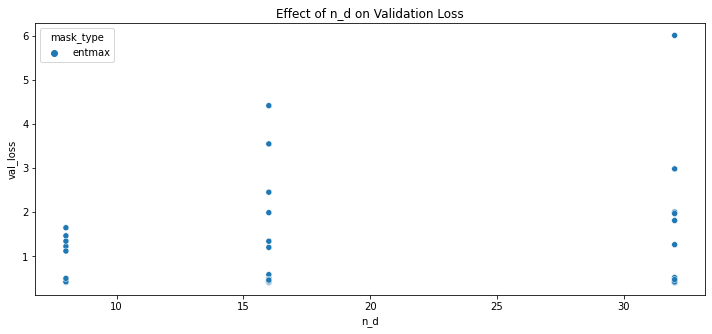

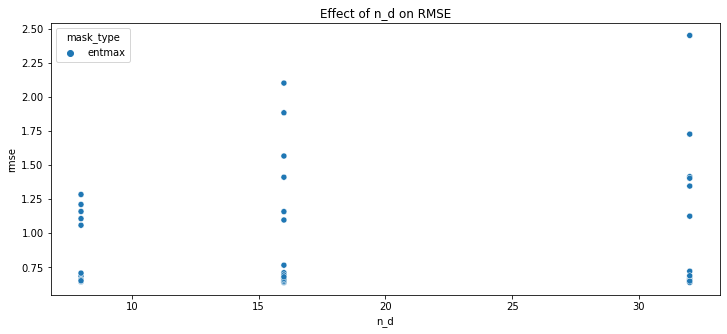

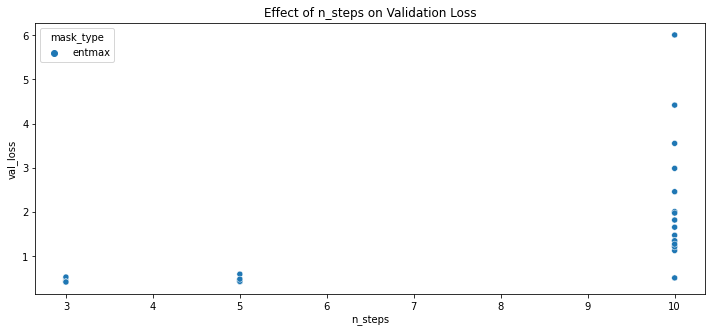

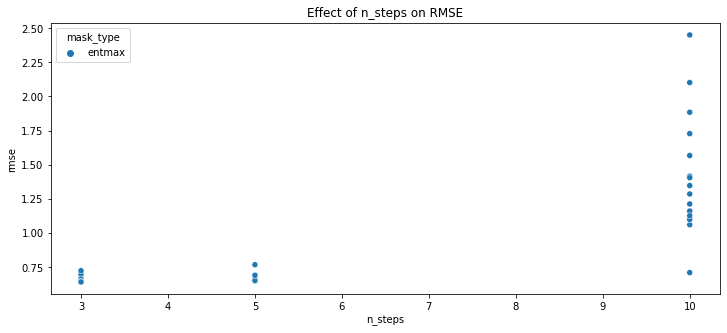

In [59]:
# Load the CSV file
results_df = pd.read_csv("tabnet_hyperparameter_search_results2.csv")

# Visualize the effect of different parameters on validation loss and RMSE
plt.figure(figsize=(12, 5))
sns.scatterplot(data=results_df, x="n_d", y="val_loss", hue="mask_type")
plt.title("Effect of n_d on Validation Loss")
plt.show()

plt.figure(figsize=(12, 5))
sns.scatterplot(data=results_df, x="n_d", y="rmse", hue="mask_type")
plt.title("Effect of n_d on RMSE")
plt.show()

plt.figure(figsize=(12, 5))
sns.scatterplot(data=results_df, x="n_steps", y="val_loss", hue="mask_type")
plt.title("Effect of n_steps on Validation Loss")
plt.show()

plt.figure(figsize=(12, 5))
sns.scatterplot(data=results_df, x="n_steps", y="rmse", hue="mask_type")
plt.title("Effect of n_steps on RMSE")
plt.show()



In [60]:
# Find the row with the minimum validation loss as the optimal parameter set
best_params = results_df.loc[results_df["val_loss"].idxmin()]
print("Best parameter combination:")
print(best_params)

Best parameter combination:
n_d                           16
n_a                            8
n_steps                        3
gamma                        1.5
lambda_sparse              0.001
optimizer_params    {'lr': 0.01}
mask_type                 entmax
train_loss              0.410536
val_loss                0.408831
rmse                    0.639399
Name: 19, dtype: object


In [63]:
# Initialize the TabNet model with the optimal parameters
tabnet_model = TabNetRegressor(
    n_d=int(best_params["n_d"]),
    n_a=int(best_params["n_a"]),
    n_steps=int(best_params["n_steps"]),
    gamma=best_params["gamma"],
    lambda_sparse=best_params["lambda_sparse"],
    optimizer_fn=torch.optim.Adam,
    optimizer_params=eval(best_params["optimizer_params"]),
    mask_type=best_params["mask_type"]
)

# Set training parameters
max_epochs = 1000
early_stopping_rounds = 10

# Train TabNet model and extract features
tabnet_model.fit(
    X_train=X_train,
    y_train=y_train_np,
    eval_set=[(X_train, y_train_np), (X_val, y_val_np)],
    max_epochs=max_epochs,
    patience=early_stopping_rounds,
    eval_metric=['rmse'],
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.27981 | val_0_rmse: 1.11882 | val_1_rmse: 1.18067 |  0:00:00s
epoch 1  | loss: 3.77337 | val_0_rmse: 1.09057 | val_1_rmse: 1.01172 |  0:00:00s
epoch 2  | loss: 3.2985  | val_0_rmse: 1.15588 | val_1_rmse: 0.97522 |  0:00:00s
epoch 3  | loss: 2.89247 | val_0_rmse: 1.28208 | val_1_rmse: 0.96588 |  0:00:00s
epoch 4  | loss: 2.51057 | val_0_rmse: 1.33601 | val_1_rmse: 0.95995 |  0:00:00s
epoch 5  | loss: 2.13982 | val_0_rmse: 1.38714 | val_1_rmse: 0.9522  |  0:00:00s
epoch 6  | loss: 2.23449 | val_0_rmse: 1.39524 | val_1_rmse: 0.94496 |  0:00:00s
epoch 7  | loss: 1.87152 | val_0_rmse: 1.51847 | val_1_rmse: 0.93883 |  0:00:01s
epoch 8  | loss: 1.67493 | val_0_rmse: 1.51849 | val_1_rmse: 0.9302  |  0:00:01s
epoch 9  | loss: 1.60763 | val_0_rmse: 1.42946 | val_1_rmse: 0.9225  |  0:00:01s
epoch 10 | loss: 1.69615 | val_0_rmse: 1.49105 | val_1_rmse: 0.9138  |  0:00:01s
epoch 11 | loss: 1.50724 | val_0_rmse: 1.57873 | val_1_rmse: 0.90773 |  0:00:01s
epoch 12 | loss: 1.32696 | v

d:\Anaconda\envs\tf_torch\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [64]:
# Extract compressed features from TabNet
X_train_compressed = tabnet_model.predict(X_train)
X_val_compressed = tabnet_model.predict(X_val)
X_test_compressed = tabnet_model.predict(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_compressed, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_compressed, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_compressed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)


In [65]:
import torch.nn.functional as F

# Optimized regression model with additional layers, dropout, and batch normalization
class OptimizedRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(OptimizedRegressionModel, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),  # Dropout with probability 0.3
            
            nn.Linear(64, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.model(x)

# Set model dimensions and output
input_dim = X_train_compressed.shape[1]
output_dim = y_train.shape[1] * 4  # Number of targets as one-hot for each column

# Initialize the optimized model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
optimized_regression_model = OptimizedRegressionModel(input_dim=input_dim, output_dim=output_dim).to(device)

# Use a different optimizer and learning rate scheduler
optimizer = optim.AdamW(optimized_regression_model.parameters(), lr=0.001, weight_decay=1e-5)  # AdamW with L2 regularization
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)  # Reduce LR by half every 20 epochs
criterion = nn.CrossEntropyLoss()

# Training loop with early stopping and learning rate scheduler
epochs = 1000
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
best_val_loss = float("inf")
no_improve_rounds = 0

In [66]:
# Extract features from TabNet
X_train_compressed = tabnet_model.predict(X_train)
X_val_compressed = tabnet_model.predict(X_val)
X_test_compressed = tabnet_model.predict(X_test)

# 转换为 PyTorch 张量
X_train_tensor = torch.tensor(X_train_compressed, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_compressed, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_compressed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

# DataLoader for batch processing
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [67]:

for epoch in tqdm(range(epochs), desc="Training Optimized Regression Model"):
    optimized_regression_model.train()
    epoch_train_loss = 0
    correct_train = 0
    total_train = 0
    
    # Training loop
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        outputs = optimized_regression_model(X_batch)
        loss = criterion(outputs.view(-1, 4), y_batch.view(-1))  # CrossEntropy loss

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item()

        # Calculate training accuracy
        _, predicted = outputs.view(-1, 4).max(1)
        correct_train += (predicted == y_batch.view(-1)).sum().item()
        total_train += y_batch.view(-1).size(0)
    
    # Average training loss and accuracy
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracy = correct_train / total_train
    train_accuracies.append(train_accuracy)

    # Validation loss and accuracy
    optimized_regression_model.eval()
    with torch.no_grad():
        val_loss = 0
        correct_val = 0
        total_val = 0
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = optimized_regression_model(X_batch)
            val_loss += criterion(outputs.view(-1, 4), y_batch.view(-1)).item()

            _, predicted = outputs.view(-1, 4).max(1)
            correct_val += (predicted == y_batch.view(-1)).sum().item()
            total_val += y_batch.view(-1).size(0)

    # Average validation loss and accuracy
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    val_accuracy = correct_val / total_val
    val_accuracies.append(val_accuracy)

    # Early stopping based on validation loss
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        no_improve_rounds = 0
    else:
        no_improve_rounds += 1

    if no_improve_rounds >= 10:
        print("Early stopping for Optimized Regression Model.")
        break

    # Update learning rate scheduler
    scheduler.step()

Training Optimized Regression Model:   4%|▍         | 43/1000 [00:03<01:27, 10.90it/s]

Early stopping for Optimized Regression Model.


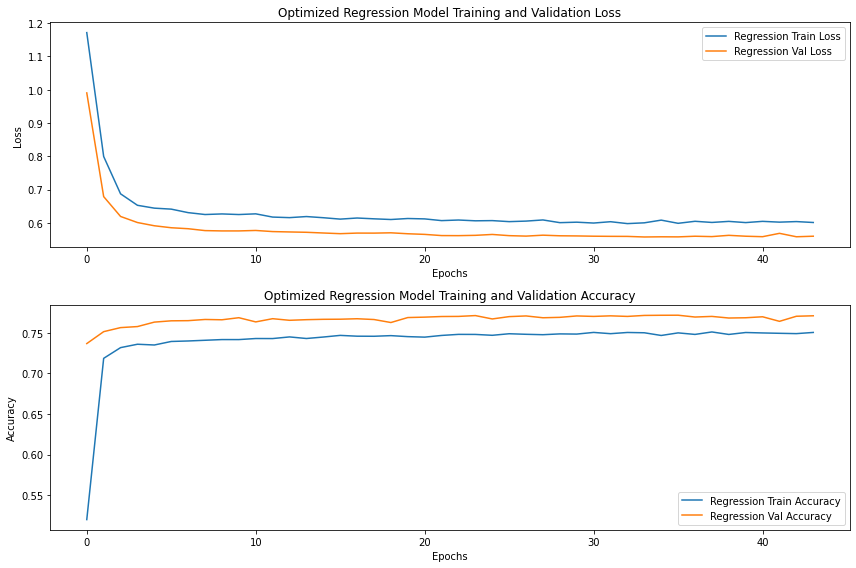

In [68]:
# Plot training and validation loss and accuracy curves
plt.figure(figsize=(12, 8))

# Plot training and validation loss
plt.subplot(2, 1, 1)
plt.plot(train_losses, label="Regression Train Loss")
plt.plot(val_losses, label="Regression Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Optimized Regression Model Training and Validation Loss")
plt.legend()

# Plot training and validation accuracy
plt.subplot(2, 1, 2)
plt.plot(train_accuracies, label="Regression Train Accuracy")
plt.plot(val_accuracies, label="Regression Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Optimized Regression Model Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


In [69]:
# print the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [70]:
# Calculate accuracy on the test set
with torch.no_grad():
    optimized_regression_model.eval()  # Set the model to evaluation mode
    test_outputs = optimized_regression_model(X_test_tensor.to(device))  # Get model predictions for test data

    # Calculate test loss using CrossEntropy
    test_loss = criterion(
        test_outputs.reshape(-1, 4),
        torch.tensor(y_test.values, dtype=torch.long).reshape(-1).to(device)
    ).item()
    
    # Calculate test accuracy
    _, test_predicted = test_outputs.reshape(-1, 4).max(1)  # Get the class predictions
    test_correct = (test_predicted == torch.tensor(y_test.values, dtype=torch.long).reshape(-1).to(device)).sum().item()
    test_total = y_test.values.size  # Total number of samples in the test set
    test_accuracy = test_correct / test_total

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.5824
Test Accuracy: 0.7606


Try based on the district not randomly select the training data

In [73]:
df_new[3]


,h3_index,density,stripclub,sports_centre,gatehouse,block,beauty_school,data_center,Noise - Noise: Construction Before/After Hours (NM1),crossing,...,industrial,carport,Noise - Park - Loud Talking,music,bowling,public_bookcase,dog_toilet,summer_camp,Noise - Vehicle - Car/Truck Music,total_complaint_count
0,8bf05aa41743fff,0.000000,0,0,0,0,0,0,2,6,...,0,0,3,0,0,0,0,0,0,98.0
1,8bf05aa65a06fff,0.000000,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,2,38.0
2,8bf05ab4c759fff,0.000000,0,0,0,0,0,0,2,6,...,0,0,0,0,0,0,0,0,3,134.0
3,8bf05aa44cd1fff,951142.310717,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,126.0
4,8bf05ab4b08cfff,0.000000,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71562,8bf0584e9775fff,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
71563,8bf058455232fff,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
71564,8bf05aa6a960fff,0.000000,0,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,1.0
71565,8bf05ab6ea19fff,65889.696876,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
